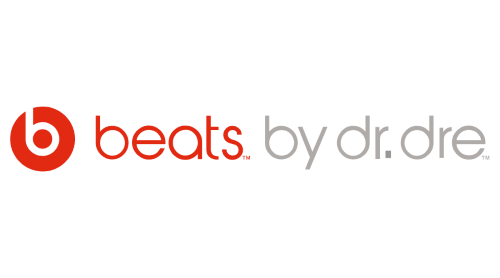

# Capstone Project: Consumer Insights for Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre

**Student Name:** Shashank Sinha | [LinkedIn](https://www.linkedin.com/in/theshashanksinha/)

**Date:** October 05, 2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview

The purpose of this project is to evaluate the performance of Beats by Dre's latest headphones in comparison to similar products from other leading brands, utilizing a comprehensive analysis of consumer insights.

Key objectives include:

1. Identifying areas where Beats products excel or fall short compared to competitors.
2. Assessing Beats’ market position within the category relative to other brands.
3. Analyzing consumer reception and feedback on the latest product release.

### 3.2 Background

Beats by Dre, founded in **2006** by **Dr. Dre** and **Jimmy Iovine**, has become a dominant force in the premium audio market, offering a range of products known for their distinctive design, sound quality, and celebrity endorsements. Acquired by **Apple** in **2014**, Beats continues to be a major player in the tech industry, particularly in the headphones and wireless audio categories.

In the tech industry, consumer sentiment analysis plays a crucial role in shaping product strategy and innovation. Understanding consumer preferences and feedback helps companies like Beats by Dre gauge market reception, identify potential areas for improvement, and maintain a competitive edge. By leveraging insights from consumer sentiment, Beats can make data-driven decisions that enhance customer satisfaction, refine product offerings, and strengthen brand loyalty in a highly competitive market.

## 4. Data Description

### 4.1 Data Sources

The data for this analysis is sourced from customer reviews of Beats headphones, along with reviews of nine other competing headphones from various companies, all collected from the Amazon USA website. Approximately 1,000 reviews were utilized in this analysis to ensure a comprehensive and accurate comparison.

### 4.2 Data Collection

Data collection for this project could be executed using Python’s Beautiful Soup or third-party web scrapers. However, due to Amazon’s frequent updates to their page layout, which complicates the scraping process, a third-party web scraper was chosen for efficiency.

One challenge encountered during this process was that the web scraper saved data as individual JSON files for each product. To overcome this, I utilized Python to convert the JSON files into a CSV format, which is more suitable for analysis.

The Python script utilized for this process is as follows:

In [ ]:
import json
import pandas as pd
import os

class ReviewExtractor:
    def __init__(self, file_path):
        """
        Initialize with the file path for the JSON data.
        """
        self.file_path = file_path
        self.reviews_data = []

    def load_data(self):
        """
        Load the JSON data from the specified file path.
        """
        if not os.path.exists(self.file_path):
            raise FileNotFoundError(f"The file {self.file_path} does not exist.")
        with open(self.file_path, 'r') as file:
            return json.load(file)

    def extract_reviews(self, data):
        """
        Extracts review information from the loaded data.
        """
        for result in data.get('results', []):
            asin = result.get('content', {}).get("asin", "Unknown ASIN")
            for review in result.get('content', {}).get('reviews', []):
                review_info = {
                    'REVIEW_ID': review.get('id', 'N/A'),
                    'PRODUCT_ID': asin,
                    'TITLE': review.get('title', 'No Title'),
                    'AUTHOR': review.get('author', 'Anonymous'),
                    'RATING': review.get('rating', 'No Rating'),
                    'CONTENT': review.get('content', 'No Content'),
                    'TIMESTAMP': review.get('timestamp', 'No Timestamp'),
                    'PROFILE_ID': review.get('profile_id', 'No Profile ID'),
                    'IS_VERIFIED': review.get('is_verified', False),
                    'HELPFUL_COUNT': review.get('helpful_count', 0),
                    'PRODUCT_ATTRIBUTES': review.get('product_attributes', {})
                }
                self.reviews_data.append(review_info)

    def save_to_csv(self, filename='reviews.csv'):
        """
        Save the extracted reviews to a CSV file.
        """
        reviews_df = pd.DataFrame(self.reviews_data)
        reviews_df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

    def process_reviews(self):
        """
        Main function to process the reviews and save them to a CSV.
        """
        try:
            data = self.load_data()
            self.extract_reviews(data)
            self.save_to_csv()
        except Exception as e:
            print(f"An error occurred: {str(e)}")

# Define the file path for the JSON data.
file_path = '/content/data.json'

# Instantiate the ReviewExtractor and process reviews.
review_extractor = ReviewExtractor(file_path)
review_extractor.process_reviews()

This script enables the conversion of the JSON file into a consolidated CSV format, streamlining the analysis process.

### 4.3 Data Cleaning

I utilized Python, specifically the Pandas and NumPy libraries, to clean and preprocess the raw review data gathered and converted from the Amazon USA website.

The process followed these steps:

1. **Data Loading:** Loaded the necessary libraries and imported the CSV file into a Pandas DataFrame.
2. **Data Inspection:** Inspected the dataset to identify issues such as missing values, inconsistent data types, and potential anomalies.
3. **Data Overview:** Used Python to retrieve the DataFrame's information and structure.
4. **Data Summarization:** Generated a summary of the dataset for a quick, high-level view.
5. **Missing Values Handling:** Detected missing values and addressed them appropriately.
6. **Replacement of Missing Values:** Replaced the missing values and rechecked the data to ensure consistency.
7. **Outlier Detection:** Checked for data outliers using the Interquartile Range (IQR) method.
8. **Outlier Treatment:** Applied capping techniques to address the outliers effectively.
9. **Duplicate Check:** Ensured that there were no duplicate entries in the dataset.
10. **Final Output:** Saved the cleaned and processed data in the desired CSV format for further analysis.

This structured approach ensured the data was in optimal condition for analysis and insights generation.

**1. Data Loading**

In [ ]:
# Import necessary libraries
import pandas as pd  # pandas for data manipulation and analysis
import numpy as np   # numpy for numerical operations

# Function to load data from a CSV file
def load_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file and return a pandas DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the loaded data.
    """
    try:
        # Read the CSV file and load it into a DataFrame
        df = pd.read_csv(file_path)
        print(f"Data successfully loaded from {file_path}")
        return df
    except FileNotFoundError:
        # Handle the case where the file is not found
        print(f"Error: The file '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        # Handle the case where the file is empty
        print(f"Error: The file '{file_path}' is empty.")
    except Exception as e:
        # Catch any other exceptions and print the error message
        print(f"An unexpected error occurred: {e}")
    return None

# Loading the dataset
data_frame = load_data('ReviewsData.csv')

Data successfully loaded from ReviewsData.csv


- With this step, the data has been successfully imported from the CSV file into the Pandas DataFrame.

**2. Data Inspection**

In [ ]:
# Display the first few rows of the DataFrame to inspect the data
def preview_data(df: pd.DataFrame, rows: int = 5) -> pd.DataFrame:
    """
    Preview the first 'n' rows of the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to preview.
    rows (int): Number of rows to display. Default is 5.

    Returns:
    pd.DataFrame: The first 'n' rows of the DataFrame.
    """
    if df is not None:
        print(f"Displaying the first {rows} rows of the DataFrame:")
        return df.head(rows)
    else:
        print("Error: DataFrame is None. Unable to preview data.")
        return None

# Display the first 5 rows of the loaded DataFrame
preview_data(data_frame)

Displaying the first 5 rows of the DataFrame:


,REVIEW_ID,PRODUCT_ID,TITLE,AUTHOR,RATING,CONTENT,TIMESTAMP,PROFILE_ID,IS_VERIFIED,HELPFUL_COUNT,PRODUCT_ATTRIBUTES
0,R3TLWEZHK2WZG8,B00HVLUR18,5.0 out of 5 stars Great studio headphones.,Kindle Customer,5,"If you've ever been in a studio, chances are y...","Reviewed in the United States August 14, 2024",AFEIJB6UTG3Y32YD7MHDE2NEPWYQ,True,6.0,Pattern Name: HeadphonesStyle: Wired
1,R3VPAE7YDR5SKY,B00HVLUR18,5.0 out of 5 stars WOW !,"A fan from Meriden, CT",5,"So I got these yesterday, and I know I am not ...","Reviewed in the United States October 14, 2015",AGWHYCMNVGRTOSJECQPSQJSTQNGA,True,34.0,Pattern Name: HeadphonesStyle: Wired
2,RWAQOPPXBBXUJ,B00HVLUR18,5.0 out of 5 stars Real nice wired headphones ...,ChrisC,5,I'm not a mega audiophile but wants some wired...,"Reviewed in the United States July 10, 2024",AEPZ5OPRZQ56FWDAYQR5LMETCPWA,True,3.0,Pattern Name: HeadphonesStyle: Wired
3,R5HWA5E3DKNKY,B00HVLUR18,4.0 out of 5 stars Best headphones for their p...,Madison B.,4,These headphones are amazing. I only have smal...,"Reviewed in the United States December 29, 2022",AHWBQJAFYMF23X5I6LHTVEVBJ6XQ,True,10.0,Pattern Name: HeadphonesStyle: Wired
4,R3HKFFSH2GU6VG,B00HVLUR18,5.0 out of 5 stars What are you waiting for?Ge...,Amazon Customer,5,Looking for a budget friendly pair of headphon...,"Reviewed in the United States December 3, 2018",AHSHEGC6JRPG5BPZNWCF2ENVOVVQ,True,23.0,Pattern Name: HeadphonesStyle: Wired


- This script displays the top five rows of the data from the DataFrame, providing a quick preview of the dataset for initial inspection.

**3. Data Overview**

In [ ]:
# Function to display DataFrame structure and information
def display_dataframe_info(df: pd.DataFrame) -> None:
    """
    Display information about the DataFrame, including column data types,
    non-null values, and memory usage.

    Parameters:
    df (pd.DataFrame): The DataFrame whose information needs to be displayed.

    Returns:
    None
    """
    if df is not None:
        print("Displaying DataFrame information:")
        print("-" * 50)
        df.info()
        print("-" * 50)
    else:
        print("Error: DataFrame is None. Unable to display information.")

# Display the information of the loaded DataFrame
display_dataframe_info(data_frame)

Displaying DataFrame information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REVIEW_ID           1000 non-null   object 
 1   PRODUCT_ID          1000 non-null   object 
 2   TITLE               1000 non-null   object 
 3   AUTHOR              1000 non-null   object 
 4   RATING              1000 non-null   int64  
 5   CONTENT             1000 non-null   object 
 6   TIMESTAMP           1000 non-null   object 
 7   PROFILE_ID          1000 non-null   object 
 8   IS_VERIFIED         1000 non-null   bool   
 9   HELPFUL_COUNT       1000 non-null   float64
 10  PRODUCT_ATTRIBUTES  999 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 79.2+ KB
--------------------------------------------------


- This step allows us to view the data types and the total number of entries in the table, offering an overview of the dataset’s structure and consistency.

**4. Data Summarization**

In [ ]:
# Function to display detailed summary statistics for different data types in a DataFrame
def display_detailed_statistics(df: pd.DataFrame) -> None:
    """
    Display descriptive statistics for numerical, categorical (object), and boolean columns separately.

    Parameters:
    df (pd.DataFrame): The DataFrame whose statistics are to be displayed.

    Returns:
    None
    """
    if df is not None:
        # Display numerical summary statistics
        print("Summary statistics for numerical columns:")
        print("-" * 50)
        print(df.describe())
        print("-" * 50)

        # Display summary statistics for categorical (object) columns
        print("Summary statistics for categorical (object) columns:")
        print("-" * 50)
        print(df.describe(include=['object']))
        print("-" * 50)

        # Display summary statistics for boolean columns
        print("Summary statistics for boolean columns:")
        print("-" * 50)
        print(df.describe(include=['bool']))
        print("-" * 50)
    else:
        print("Error: DataFrame is None. Unable to display summary statistics.")

# Display detailed statistics of the DataFrame
display_detailed_statistics(data_frame)

Summary statistics for numerical columns:
--------------------------------------------------
            RATING  HELPFUL_COUNT
count  1000.000000     1000.00000
mean      4.578000       11.46570
std       0.722799       55.66245
min       1.000000        0.00000
25%       4.000000        0.00000
50%       5.000000        0.00000
75%       5.000000        1.00000
max       5.000000      449.27000
--------------------------------------------------
Summary statistics for categorical (object) columns:
--------------------------------------------------
             REVIEW_ID  PRODUCT_ID                                TITLE  \
count             1000        1000                                 1000   
unique            1000          10                                  950   
top     R3TLWEZHK2WZG8  B00HVLUR18  5.0 out of 5 stars Great headphones   
freq                 1         100                                    5   

                 AUTHOR        CONTENT  \
count              1000     

- This step generates a summary of the data within the DataFrame, offering key statistical insights such as count, mean, and distribution for each column, which aids in understanding the dataset at a glance.

**5. Missing Values Handling**

In [ ]:
# Function to display the count of missing values (nulls) in each column of the DataFrame
def display_missing_values(df: pd.DataFrame) -> pd.Series:
    """
    Display the count of missing (NaN) values for each column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame whose missing values are to be displayed.

    Returns:
    pd.Series: A series with the count of missing values for each column.
    """
    if df is not None:
        print("Count of missing (NaN) values per column:")
        print("-" * 50)
        missing_values = df.isnull().sum()
        print(missing_values)
        print("-" * 50)
        return missing_values
    else:
        print("Error: DataFrame is None. Unable to display missing values.")
        return None

# Display missing values in the DataFrame
missing_values_summary = display_missing_values(data_frame)

Count of missing (NaN) values per column:
--------------------------------------------------
REVIEW_ID             0
PRODUCT_ID            0
TITLE                 0
AUTHOR                0
RATING                0
CONTENT               0
TIMESTAMP             0
PROFILE_ID            0
IS_VERIFIED           0
HELPFUL_COUNT         0
PRODUCT_ATTRIBUTES    1
dtype: int64
--------------------------------------------------


- This script identifies and displays the number of missing (null) values in the dataset, helping us pinpoint areas that require data cleaning or handling of incomplete entries.

**6. Replacement of Missing Values**

In [ ]:
# Function to fill missing values in the DataFrame
def fill_missing_values(df: pd.DataFrame, fill_value: str = 'N/A') -> pd.DataFrame:
    """
    Fill missing (NaN) values in the DataFrame with the specified fill value.

    Parameters:
    df (pd.DataFrame): The DataFrame where missing values are to be filled.
    fill_value (str): The value to fill missing values with. Default is 'N/A'.

    Returns:
    pd.DataFrame: The DataFrame with filled missing values.
    """
    if df is not None:
        print(f"Filling missing values with '{fill_value}'...")
        df.fillna(fill_value, inplace=True)
        print("Missing values have been filled.")
        return df
    else:
        print("Error: DataFrame is None. Unable to fill missing values.")
        return None

# Function to display the count of remaining missing values (if any)
def display_remaining_missing_values(df: pd.DataFrame) -> pd.Series:
    """
    Display the count of remaining missing (NaN) values for each column after filling.

    Parameters:
    df (pd.DataFrame): The DataFrame to check for remaining missing values.

    Returns:
    pd.Series: A series with the count of remaining missing values for each column.
    """
    if df is not None:
        print("Count of remaining missing (NaN) values per column after filling:")
        print("-" * 50)
        remaining_missing_values = df.isnull().sum()
        print(remaining_missing_values)
        print("-" * 50)
        return remaining_missing_values
    else:
        print("Error: DataFrame is None. Unable to display remaining missing values.")
        return None

# Fill missing values and display remaining missing values
data_frame = fill_missing_values(data_frame, 'N/A')
remaining_missing_values_summary = display_remaining_missing_values(data_frame)

Filling missing values with 'N/A'...
Missing values have been filled.
Count of remaining missing (NaN) values per column after filling:
--------------------------------------------------
REVIEW_ID             0
PRODUCT_ID            0
TITLE                 0
AUTHOR                0
RATING                0
CONTENT               0
TIMESTAMP             0
PROFILE_ID            0
IS_VERIFIED           0
HELPFUL_COUNT         0
PRODUCT_ATTRIBUTES    0
dtype: int64
--------------------------------------------------


- This code successfully fills the missing values in the dataset, and an additional check is performed at the end to confirm that no missing values remain, ensuring data completeness for further analysis.

**7. Outlier Detection**

In [ ]:
# Function to calculate and identify outliers based on the IQR method
def detect_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Detect outliers in the specified numerical columns of the DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame to check for outliers.
    columns (list): List of numerical column names to check for outliers.

    Returns:
    pd.DataFrame: A DataFrame containing the rows with detected outliers.
    """
    if df is not None and all(col in df.columns for col in columns):
        # Calculate the first (Q1) and third quartiles (Q3) for the selected columns
        Q1 = df[columns].quantile(0.25)
        Q3 = df[columns].quantile(0.75)
        IQR = Q3 - Q1

        print(f"Q1 (25th percentile):\n{Q1}")
        print(f"Q3 (75th percentile):\n{Q3}")
        print(f"IQR (Interquartile Range):\n{IQR}")

        # Define outliers as values outside of 1.5 * IQR range
        outliers = ((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)

        # Display the rows with potential outliers
        df_outliers = df[outliers]
        print(f"Number of rows with potential outliers: {df_outliers.shape[0]}")
        return df_outliers
    else:
        print("Error: Invalid DataFrame or column names.")
        return None

# Function to display summary statistics of the outliers
def describe_outliers(df_outliers: pd.DataFrame) -> pd.DataFrame:
    """
    Display the descriptive statistics for the outliers DataFrame.

    Parameters:
    df_outliers (pd.DataFrame): The DataFrame containing the outliers.

    Returns:
    pd.DataFrame: Descriptive statistics of the outliers DataFrame.
    """
    if df_outliers is not None and not df_outliers.empty:
        print("Summary statistics for the outliers:")
        print("-" * 50)
        description = df_outliers.describe()
        print(description)
        print("-" * 50)
        return description
    else:
        print("No outliers detected or DataFrame is empty.")
        return None

# Detect outliers in 'RATING' and 'HELPFUL_COUNT' columns
outliers_df = detect_outliers(data_frame, ['RATING', 'HELPFUL_COUNT'])

# Display descriptive statistics for the detected outliers
outliers_description = describe_outliers(outliers_df)

Q1 (25th percentile):
RATING           4.0
HELPFUL_COUNT    0.0
Name: 0.25, dtype: float64
Q3 (75th percentile):
RATING           5.0
HELPFUL_COUNT    1.0
Name: 0.75, dtype: float64
IQR (Interquartile Range):
RATING           1.0
HELPFUL_COUNT    1.0
dtype: float64
Number of rows with potential outliers: 211
Summary statistics for the outliers:
--------------------------------------------------
           RATING  HELPFUL_COUNT
count  211.000000     211.000000
mean     4.293839      53.131280
std      1.064094     111.924049
min      1.000000       0.000000
25%      4.000000       4.000000
50%      5.000000       8.000000
75%      5.000000      26.500000
max      5.000000     449.270000
--------------------------------------------------


- For outlier detection, I applied the Interquartile Range (IQR) method. The IQR represents the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the dataset. Any data points falling outside 1.5 times the IQR are classified as outliers.

**8. Outlier Treatment**

In [ ]:
# Function to cap values in a column based on a specified upper quantile
def cap_outliers_at_quantile(df: pd.DataFrame, column: str, quantile: float = 0.99) -> pd.DataFrame:
    """
    Cap the values in the specified column at a given upper quantile threshold.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column where values will be capped.
    quantile (float): The quantile to use as the upper threshold. Default is 0.99 (99th percentile).

    Returns:
    pd.DataFrame: The DataFrame with the capped values in the specified column.
    """
    if df is not None and column in df.columns:
        # Calculate the upper limit based on the quantile
        upper_limit = df[column].quantile(quantile)
        print(f"Capping values in '{column}' at the {quantile * 100:.0f}th percentile: {upper_limit}")

        # Cap values in the column that exceed the upper limit
        df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
        print(f"Values in '{column}' have been capped.")
        return df
    else:
        print("Error: Invalid DataFrame or column name.")
        return None

# Cap values in 'HELPFUL_COUNT' at the 99th percentile
data_frame = cap_outliers_at_quantile(data_frame, 'HELPFUL_COUNT', 0.99)

Capping values in 'HELPFUL_COUNT' at the 99th percentile: 449.0027
Values in 'HELPFUL_COUNT' have been capped.


- To address the outlier issue, I used capping, which adjusts extreme values to a predefined threshold, ensuring the data remains within a reasonable range without distorting the overall dataset. This method preserves the dataset's integrity while reducing the impact of outliers.

**9. Duplicate Check**

In [ ]:
# Function to identify and display duplicate rows in a DataFrame
def find_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    """
    Identify and return the duplicate rows in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    pd.DataFrame: A DataFrame containing the duplicate rows, if any.
    """
    if df is not None:
        # Find duplicate rows
        df_duplicates = df[df.duplicated()]
        duplicate_count = df_duplicates.shape[0]

        # Display information about duplicates
        if duplicate_count > 0:
            print(f"Found {duplicate_count} duplicate rows:")
            print("-" * 50)
            print(df_duplicates)
            print("-" * 50)
        else:
            print("No duplicate rows found.")

        return df_duplicates
    else:
        print("Error: DataFrame is None. Unable to check for duplicates.")
        return None

# Find and display duplicates in the DataFrame
df_duplicates = find_duplicates(data_frame)

No duplicate rows found.


- I utilized this code to check for duplicate entries in the dataset and confirmed that no duplicates were found, ensuring the data’s uniqueness and reliability.

**10. Final Output**

In [ ]:
# Function to save the DataFrame to a CSV file
def save_dataframe_to_csv(df: pd.DataFrame, file_path: str, include_index: bool = False) -> None:
    """
    Save the DataFrame to a CSV file.

    Parameters:
    df (pd.DataFrame): The DataFrame to be saved.
    file_path (str): The file path where the CSV will be saved.
    include_index (bool): Whether to include the DataFrame's index in the CSV file. Default is False.

    Returns:
    None
    """
    if df is not None:
        try:
            # Save the DataFrame to a CSV file
            df.to_csv(file_path, index=include_index)
            print(f"DataFrame successfully saved to '{file_path}'")
        except Exception as e:
            # Handle any exceptions that may occur during the file save process
            print(f"An error occurred while saving the DataFrame to CSV: {e}")
    else:
        print("Error: DataFrame is None. Unable to save to CSV.")

# Save the DataFrame to 'CleanedReviewsData.csv' without including the index
save_dataframe_to_csv(data_frame, 'CleanedReviewsData.csv', include_index=False)

DataFrame successfully saved to 'CleanedReviewsData.csv'


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview

The dataset consists of customer reviews for 10 headphone brands, including our primary product of focus, the Beats by Dre Beats Studio Pro. The total number of reviews amounts to approximately 1,000, providing an average of 100 reviews per product, which is a sufficient sample size for comprehensive analysis.

The dataset is structured as follows:

| Column                | Data Type   |
|-----------------------|-------------|
| REVIEW_ID             | object      |
| PRODUCT_ID            | object      |
| TITLE                 | object      |
| AUTHOR                | object      |
| RATING                | int64       |
| CONTENT               | object      |
| TIMESTAMP             | object      |
| PROFILE_ID            | object      |
| IS_VERIFIED           | bool        |
| HELPFUL_COUNT         | float64     |
| PRODUCT_ATTRIBUTES    | object      |

This structure ensures a detailed and organized view of the reviews, making it suitable for analysis.

In [ ]:
import pandas as pd
# Function to load 'CleanedReviewsData.csv' and set it as the main DataFrame for future operations
def load_main_dataframe(file_path: str) -> pd.DataFrame:
    """
    Load the 'CleanedReviewsData.csv' as the main DataFrame for future operations.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The main DataFrame for all future operations.
    """
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Print confirmation and display structure of the main DataFrame
        print(f"Main DataFrame loaded from '{file_path}'.")
        print("\nDataFrame structure:")
        print("-" * 50)
        print(df.info())  # Display structure of the DataFrame
        print("-" * 50)

        return df
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None

# Load 'CleanedReviewsData.csv' as the main DataFrame
main_dataframe = load_main_dataframe('CleanedReviewsData.csv')

# Now 'main_dataframe' will be used for all future work

Main DataFrame loaded from 'CleanedReviewsData.csv'.

DataFrame structure:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REVIEW_ID           1000 non-null   object 
 1   PRODUCT_ID          1000 non-null   object 
 2   TITLE               1000 non-null   object 
 3   AUTHOR              1000 non-null   object 
 4   RATING              1000 non-null   int64  
 5   CONTENT             1000 non-null   object 
 6   TIMESTAMP           1000 non-null   object 
 7   PROFILE_ID          1000 non-null   object 
 8   IS_VERIFIED         1000 non-null   bool   
 9   HELPFUL_COUNT       1000 non-null   float64
 10  PRODUCT_ATTRIBUTES  999 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 79.2+ KB
None
--------------------------------------------------


- This step establishes our newly created 'CleanedReviewsData.csv' as the primary dataset within the DataFrame, which will be used for all subsequent analysis and processing.

In [ ]:
# Function to remove 'Reviewed in the United States' and clean leading/trailing whitespaces from the TIMESTAMP column
def clean_timestamp_column(df: pd.DataFrame, timestamp_column: str) -> pd.DataFrame:
    """
    Remove 'Reviewed in the United States' from the TIMESTAMP column and clean leading/trailing whitespaces.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the timestamp column.
    timestamp_column (str): The column from which text and whitespace will be cleaned.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    if df is not None and timestamp_column in df.columns:
        # Step 1: Remove 'Reviewed in the United States' from the TIMESTAMP column
        df[timestamp_column] = df[timestamp_column].str.replace(r'^Reviewed in the United States\s*', '', regex=True)

        # Step 2: Remove leading and trailing whitespace from the TIMESTAMP column
        df[timestamp_column] = df[timestamp_column].str.strip()

        print(f"Cleaned the '{timestamp_column}' column.")
        return df
    else:
        print("Error: Invalid DataFrame or timestamp column.")
        return df

# Code to clean the TIMESTAMP column
main_dataframe = clean_timestamp_column(main_dataframe, 'TIMESTAMP')

# Check the cleaned TIMESTAMP column
print(main_dataframe['TIMESTAMP'].head())

Cleaned the 'TIMESTAMP' column.
0      August 14, 2024
1     October 14, 2015
2        July 10, 2024
3    December 29, 2022
4     December 3, 2018
Name: TIMESTAMP, dtype: object


In [ ]:
main_dataframe.head()

,REVIEW_ID,PRODUCT_ID,TITLE,AUTHOR,RATING,CONTENT,TIMESTAMP,PROFILE_ID,IS_VERIFIED,HELPFUL_COUNT,PRODUCT_ATTRIBUTES
0,R3TLWEZHK2WZG8,B00HVLUR18,5.0 out of 5 stars Great studio headphones.,Kindle Customer,5,"If you've ever been in a studio, chances are y...","August 14, 2024",AFEIJB6UTG3Y32YD7MHDE2NEPWYQ,True,6.0,Pattern Name: HeadphonesStyle: Wired
1,R3VPAE7YDR5SKY,B00HVLUR18,5.0 out of 5 stars WOW !,"A fan from Meriden, CT",5,"So I got these yesterday, and I know I am not ...","October 14, 2015",AGWHYCMNVGRTOSJECQPSQJSTQNGA,True,34.0,Pattern Name: HeadphonesStyle: Wired
2,RWAQOPPXBBXUJ,B00HVLUR18,5.0 out of 5 stars Real nice wired headphones ...,ChrisC,5,I'm not a mega audiophile but wants some wired...,"July 10, 2024",AEPZ5OPRZQ56FWDAYQR5LMETCPWA,True,3.0,Pattern Name: HeadphonesStyle: Wired
3,R5HWA5E3DKNKY,B00HVLUR18,4.0 out of 5 stars Best headphones for their p...,Madison B.,4,These headphones are amazing. I only have smal...,"December 29, 2022",AHWBQJAFYMF23X5I6LHTVEVBJ6XQ,True,10.0,Pattern Name: HeadphonesStyle: Wired
4,R3HKFFSH2GU6VG,B00HVLUR18,5.0 out of 5 stars What are you waiting for?Ge...,Amazon Customer,5,Looking for a budget friendly pair of headphon...,"December 3, 2018",AHSHEGC6JRPG5BPZNWCF2ENVOVVQ,True,23.0,Pattern Name: HeadphonesStyle: Wired


- This script successfully removed unnecessary parts of the string in the TIMESTAMP column and eliminated any leading or trailing whitespace. The column now contains correctly formatted dates in the "MMMM DD, YYYY" format, ensuring consistency and accuracy for further analysis.

**Mean:** `df.mean(numeric_only=True)` calculates the mean (average) for all numerical columns.

In [ ]:
# Function to calculate the mean for numerical columns
def calculate_mean(df: pd.DataFrame) -> pd.Series:
    """
    Calculate and return the mean of numerical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
    pd.Series: The mean values for the numerical columns.
    """
    mean_values = df.mean(numeric_only=True)
    print("Mean values:")
    print(mean_values)
    return mean_values

# Code usage
mean_values = calculate_mean(main_dataframe)

Mean values:
RATING            4.578000
IS_VERIFIED       1.000000
HELPFUL_COUNT    11.463027
dtype: float64


**Median:** `df.median(numeric_only=True)` calculates the median (middle value) for the numerical columns.

In [ ]:
# Function to calculate the median for numerical columns
def calculate_median(df: pd.DataFrame) -> pd.Series:
    """
    Calculate and return the median of numerical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
    pd.Series: The median values for the numerical columns.
    """
    median_values = df.median(numeric_only=True)
    print("Median values:")
    print(median_values)
    return median_values

# Code usage
median_values = calculate_median(main_dataframe)

Median values:
RATING           5.0
IS_VERIFIED      1.0
HELPFUL_COUNT    0.0
dtype: float64


**Mode:** `df.mode(numeric_only=True)` finds the mode (most frequent value) for the numerical columns, and .iloc[0] selects the first mode in case of multiple modes.

In [ ]:
# Function to calculate the mode for numerical columns
def calculate_mode(df: pd.DataFrame) -> pd.Series:
    """
    Calculate and return the mode of numerical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
    pd.Series: The mode values for the numerical columns.
    """
    mode_values = df.mode(numeric_only=True).iloc[0]  # Get the first mode if multiple exist
    print("Mode values:")
    print(mode_values)
    return mode_values

# Code usage
mode_values = calculate_mode(main_dataframe)

Mode values:
RATING              5
IS_VERIFIED      True
HELPFUL_COUNT     0.0
Name: 0, dtype: object


**Standard Deviation:** `df.std(numeric_only=True)` computes the standard deviation, showing the spread of the data.

In [ ]:
# Function to calculate the standard deviation for numerical columns
def calculate_std(df: pd.DataFrame) -> pd.Series:
    """
    Calculate and return the standard deviation of numerical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
    pd.Series: The standard deviation values for the numerical columns.
    """
    std_values = df.std(numeric_only=True)
    print("Standard Deviation values:")
    print(std_values)
    return std_values

# Code usage
std_values = calculate_std(main_dataframe)

Standard Deviation values:
RATING            0.722799
IS_VERIFIED       0.000000
HELPFUL_COUNT    55.641407
dtype: float64


**Descriptive Statistics:** `df.describe()` provides an overall summary, including count, mean, standard deviation, min, max, and percentiles.

In [ ]:
# Function to display descriptive statistics for numerical columns
def display_descriptive_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Display descriptive statistics (min, max, quartiles, etc.) for numerical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
    pd.DataFrame: A DataFrame containing descriptive statistics.
    """
    descriptive_stats = df.describe()
    print("Descriptive Statistics:")
    print(descriptive_stats)
    return descriptive_stats

# Code usage
descriptive_stats = display_descriptive_statistics(main_dataframe)

Descriptive Statistics:
            RATING  HELPFUL_COUNT
count  1000.000000    1000.000000
mean      4.578000      11.463027
std       0.722799      55.641407
min       1.000000       0.000000
25%       4.000000       0.000000
50%       5.000000       0.000000
75%       5.000000       1.000000
max       5.000000     449.002700


### 5.2 Visualizations

- Before initiating the data visualization process, we will map each PRODUCT_ID to its corresponding brand name and assign specific brand colors. This approach ensures consistency and enhances the clarity of our visualizations.

In [ ]:
# Mapping of PRODUCT_ID to brand names
brand_mapping = {
    'B0D95134GD': 'Beats Studio Pro',
    'B0CTBCDD6D': 'JBL Tune',
    'B0BS74M665': 'Sony WH-CH',
    'B00HVLUR18': 'Audio-Technica ATH',
    'B09NBVS84T': 'Logitech Zone',
    'B0CD1F3WCC': 'Skullcandy Crusher',
    'B075LT8YLR': 'Panasonic Headphones',
    'B01L1IICR2': 'Sennheiser',
    'B07NM3RSRQ': 'Soundcore Anker',
    'B0CCZ26B5V': 'Bose QuietComfort'
}

# Custom light colors for each brand to suit white and dark backgrounds
brand_colors = {
    'Beats Studio Pro': '#FF7F7F',  # Light red
    'JBL Tune': '#FFC300',  # Light orange-yellow
    'Sony WH-CH': '#A9A9A9',  # Light grey
    'Audio-Technica ATH': '#B19CD9',  # Light lavender
    'Logitech Zone': '#98FB98',  # Pale green
    'Skullcandy Crusher': '#FF6347',  # Light coral
    'Panasonic Headphones': '#87CEEB',  # Light sky blue
    'Sennheiser': '#40E0D0',  # Turquoise
    'Soundcore Anker': '#87CEFA',  # Light steel blue
    'Bose QuietComfort': '#ADD8E6'  # Light blue
}

In [ ]:
import pandas as pd
# Function to map PRODUCT_ID to BRAND using the brand_mapping dictionary
def map_product_to_brand(df: pd.DataFrame, product_column: str, mapping: dict) -> pd.DataFrame:
    """
    Map the PRODUCT_ID column to corresponding brand names using a mapping dictionary.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the PRODUCT_ID column.
    product_column (str): The column that contains product IDs.
    mapping (dict): A dictionary mapping product IDs to brand names.

    Returns:
    pd.DataFrame: The DataFrame with an added 'BRAND' column.
    """
    if df is not None and product_column in df.columns:
        # Map PRODUCT_ID to BRAND and create a new 'BRAND' column
        df['BRAND'] = df[product_column].map(mapping)
        print("BRAND column successfully added to the DataFrame.")
        return df
    else:
        print("Error: Invalid DataFrame or product_column.")
        return df

# Usage to map PRODUCT_ID to BRAND
main_dataframe = map_product_to_brand(main_dataframe, 'PRODUCT_ID', brand_mapping)

# Check the updated DataFrame
print(main_dataframe[['PRODUCT_ID', 'BRAND']].head())

BRAND column successfully added to the DataFrame.
   PRODUCT_ID               BRAND
0  B00HVLUR18  Audio-Technica ATH
1  B00HVLUR18  Audio-Technica ATH
2  B00HVLUR18  Audio-Technica ATH
3  B00HVLUR18  Audio-Technica ATH
4  B00HVLUR18  Audio-Technica ATH


In [ ]:
main_dataframe.head()

,REVIEW_ID,PRODUCT_ID,TITLE,AUTHOR,RATING,CONTENT,TIMESTAMP,PROFILE_ID,IS_VERIFIED,HELPFUL_COUNT,PRODUCT_ATTRIBUTES,BRAND
0,R3TLWEZHK2WZG8,B00HVLUR18,5.0 out of 5 stars Great studio headphones.,Kindle Customer,5,"If you've ever been in a studio, chances are y...","August 14, 2024",AFEIJB6UTG3Y32YD7MHDE2NEPWYQ,True,6.0,Pattern Name: HeadphonesStyle: Wired,Audio-Technica ATH
1,R3VPAE7YDR5SKY,B00HVLUR18,5.0 out of 5 stars WOW !,"A fan from Meriden, CT",5,"So I got these yesterday, and I know I am not ...","October 14, 2015",AGWHYCMNVGRTOSJECQPSQJSTQNGA,True,34.0,Pattern Name: HeadphonesStyle: Wired,Audio-Technica ATH
2,RWAQOPPXBBXUJ,B00HVLUR18,5.0 out of 5 stars Real nice wired headphones ...,ChrisC,5,I'm not a mega audiophile but wants some wired...,"July 10, 2024",AEPZ5OPRZQ56FWDAYQR5LMETCPWA,True,3.0,Pattern Name: HeadphonesStyle: Wired,Audio-Technica ATH
3,R5HWA5E3DKNKY,B00HVLUR18,4.0 out of 5 stars Best headphones for their p...,Madison B.,4,These headphones are amazing. I only have smal...,"December 29, 2022",AHWBQJAFYMF23X5I6LHTVEVBJ6XQ,True,10.0,Pattern Name: HeadphonesStyle: Wired,Audio-Technica ATH
4,R3HKFFSH2GU6VG,B00HVLUR18,5.0 out of 5 stars What are you waiting for?Ge...,Amazon Customer,5,Looking for a budget friendly pair of headphon...,"December 3, 2018",AHSHEGC6JRPG5BPZNWCF2ENVOVVQ,True,23.0,Pattern Name: HeadphonesStyle: Wired,Audio-Technica ATH


-  With this code, we have successfully added the corresponding brand names to the data table based on the PRODUCT_ID, enhancing the dataset for more intuitive analysis and visualization.

**Percentage Distribution - Comparative Analysis**

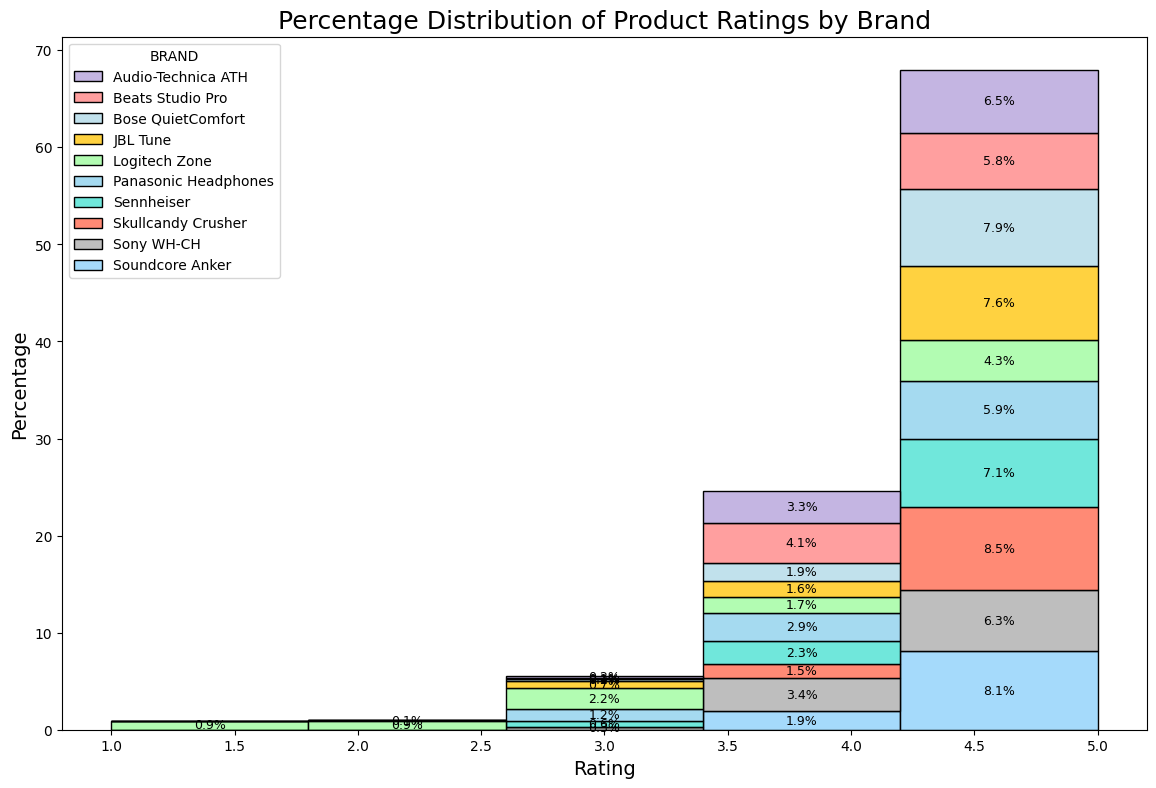

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the brand mapping and color palettes if not already defined
# Assuming brand_colors is already defined as shown in previous examples

# Function to plot histogram with percentage distribution by brand
def plot_histogram_with_percentage(df: pd.DataFrame) -> None:
    """
    Plot a stacked histogram of product ratings by brand, showing percentage distributions.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'RATING' and 'BRAND' columns.

    Returns:
    None
    """
    plt.figure(figsize=(14, 9))

    # Plot stacked histogram normalized to show percentages
    ax = sns.histplot(df, x='RATING', hue='BRAND', multiple='stack', palette=brand_colors, bins=5, stat='percent', kde=False)

    # Add percentage labels inside each stacked bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                        ha='center', va='center', fontsize=9, color='black')

    # Set title and axis labels
    plt.title('Percentage Distribution of Product Ratings by Brand', fontsize=18)
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Percentage', fontsize=14)

    # Display the plot
    plt.show()

# Code of the function with the main DataFrame
plot_histogram_with_percentage(main_dataframe)

**Description:**
The chart depicts the percentage distribution of customer ratings for various headphone brands, including **Beats Studio Pro**, **JBL Tune**, **Sony WH-CH**, **Audio-Technica ATH**, **Logitech Zone**, **Skullcandy Crusher**, **Panasonic Headphones**, **Sennheiser**, **Soundcore Anker**, and **Bose QuietComfort**. The ratings range from 1.0 to 5.0 stars, stacked to display the proportion of ratings across all brands, offering a visual insight into customer satisfaction and product performance.

**Insights:**

1. **High Ratings (4.0 - 5.0 Stars) Dominate:**
   - **Soundcore Anker** leads with **8.1%** of 5-star ratings, closely followed by **Skullcandy Crusher (8.5%)**, **Bose QuietComfort (7.9%)**, and **Sennheiser (7.1%)**, indicating strong customer satisfaction.
   - **JBL Tune** and **Sony WH-CH** also perform well with **7.6%** and **6.3%** 5-star ratings, respectively.
   - **Audio-Technica ATH** and **Beats Studio Pro** display solid 5-star ratings at **6.5%** and **5.8%**, reflecting positive customer experiences.

2. **Mid-Range Ratings (3.0 - 4.0 Stars):**
   - **Panasonic Headphones** show a more significant presence in the mid-range with **2.2%** at 3.0 stars and **3.4%** at 3.5 stars, suggesting mixed feedback but no substantial dissatisfaction.
   - **Bose QuietComfort** and **Sennheiser** have moderate presence in the 3.5-star range, at **2.9%** and **1.7%**, respectively.

3. **Low Ratings (1.0 - 2.0 Stars):**
   - Few products received ratings below 3.0 stars, with **Logitech Zone (0.3%)** and **Panasonic Headphones (0.0%)** showing minimal dissatisfaction, indicating general customer satisfaction across most brands.

4. **Brand-Level Observations:**
   - **Soundcore Anker**, **Skullcandy Crusher**, and **Bose QuietComfort** are the leaders in 5-star ratings, indicating a high level of customer satisfaction.
   - **Panasonic Headphones** and **Beats Studio Pro** have a broader distribution of ratings across multiple levels, indicating more varied customer opinions, particularly in mid-tier ratings.

**Rating Distribution by Brand**

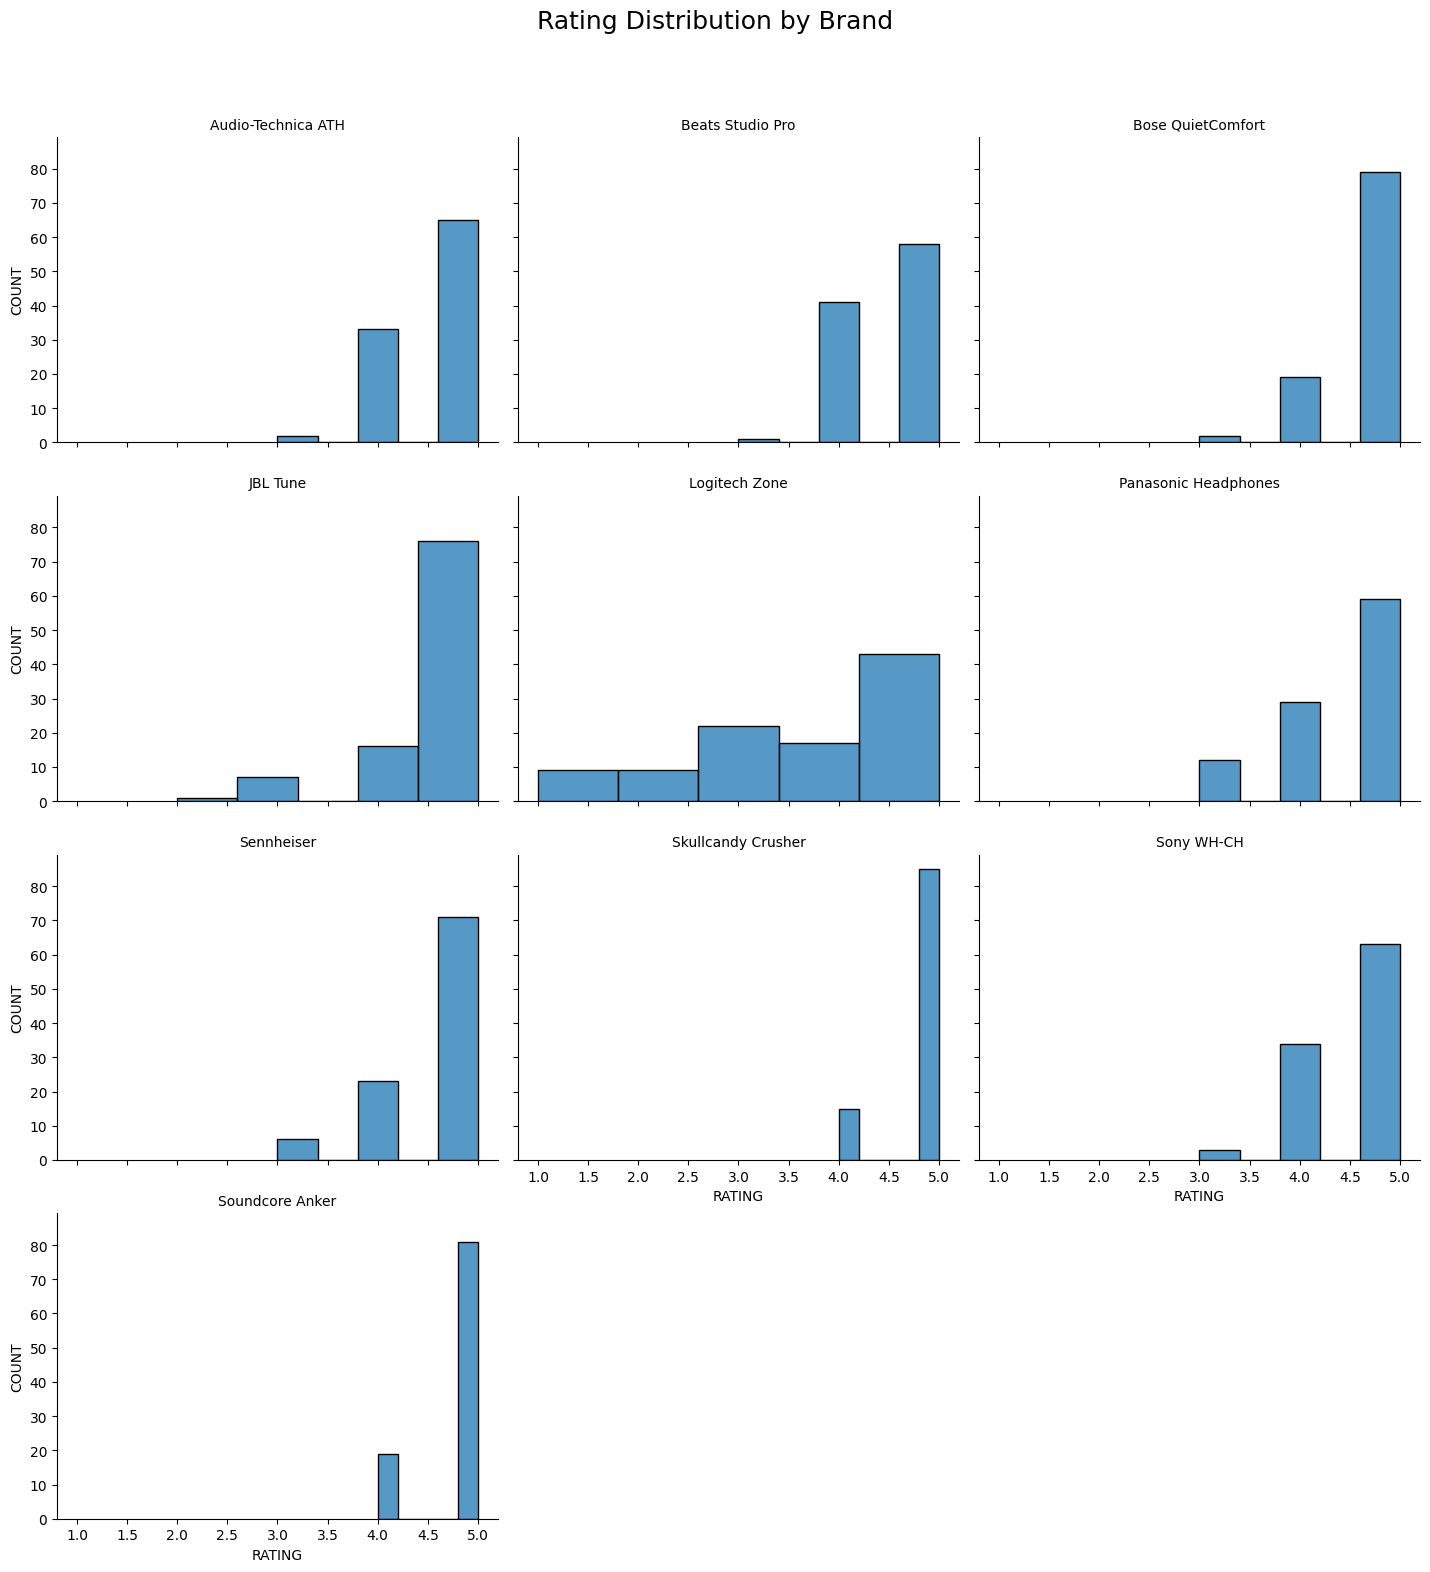

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the brand colors if not already defined
# Assuming brand_colors is already defined as shown in previous examples

# Function to plot facet histograms by brand
def plot_facet_by_brand(df: pd.DataFrame) -> None:
    """
    Plot a facet grid of histograms by brand, showing the distribution of product ratings.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'RATING' and 'BRAND' columns.

    Returns:
    None
    """
    # Create a facet grid with each brand in a separate subplot
    g = sns.FacetGrid(df, col="BRAND", col_wrap=3, height=4, aspect=1.2, palette=brand_colors)

    # Map histplot for each brand's rating distribution
    g.map(sns.histplot, 'RATING', bins=5)

    # Set column titles and axis labels
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("RATING", "COUNT")

    # Adjust layout and add a main title
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Rating Distribution by Brand', fontsize=18)

    # Show the plot
    plt.show()

# Usage of the function with the main DataFrame
plot_facet_by_brand(main_dataframe)

**Description:**
The facet grid chart presents a detailed breakdown of customer ratings for each individual headphone brand. Each plot shows the distribution of ratings from 1.0 to 5.0 stars for a specific brand, allowing for a side-by-side comparison of how customers rate each product. This visualization offers a more granular perspective on customer satisfaction, highlighting how ratings vary within each brand.

**Insights:**

1. **Audio-Technica ATH:**
   - Ratings are concentrated between 4.0 and 5.0 stars, with over **80** reviews in the 5-star category, indicating a very strong customer preference for the brand.
   - There are virtually no ratings below 3.0 stars, reinforcing the brand's quality and reliability.

2. **Beats Studio Pro:**
   - The majority of ratings are clustered in the 4.0 to 5.0 star range, with **approximately 70** reviews at 5 stars and **50** at 4 stars.
   - The brand shows high customer satisfaction but also some moderate feedback with a smaller number of 3-star ratings.

3. **Bose QuietComfort:**
   - Bose enjoys overwhelmingly positive reviews, with the bulk of ratings at **5 stars**, totaling over **70** reviews.
   - There are very few ratings below 4 stars, reflecting a loyal and satisfied customer base.

4. **JBL Tune:**
   - JBL Tune has a substantial number of **5-star** reviews, around **70**.
   - There is a moderate presence of 4-star ratings, but the number of lower ratings is negligible.

5. **Logitech Zone:**
   - Logitech Zone displays a more spread-out distribution, with a noticeable amount of **3-star** and **4-star** ratings.
   - Although there are **5-star** reviews, they are fewer compared to other brands, suggesting mixed customer feedback.

6. **Panasonic Headphones:**
   - The ratings are distributed mostly in the **3-star** to **5-star** range, with a prominent spike at **5 stars**.
   - Some customers seem to have had a more average experience, as reflected in the 3-star reviews.

7. **Sennheiser:**
   - Sennheiser has a large concentration of **5-star** ratings, with minimal reviews below 4 stars, reinforcing its strong brand reputation.
   - The distribution suggests consistent satisfaction among customers.

8. **Skullcandy Crusher:**
   - Skullcandy Crusher stands out with **5-star** ratings dominating the distribution, with almost **70** reviews.
   - There is also a small but significant presence of **4-star** ratings, showing high satisfaction with occasional moderate feedback.

9. **Sony WH-CH:**
   - Sony WH-CH shows a balanced distribution between **4-star** and **5-star** ratings, indicating good but not overwhelmingly positive feedback from customers.
   - Very few ratings below 4 stars suggest solid performance overall.

10. **Soundcore Anker:**
   - **Soundcore Anker** has an extremely strong presence in the **5-star** category, with almost all ratings falling at the highest level.
   - The near absence of any other ratings categories emphasizes the brand’s popularity and consistent quality.

**Distribution with Total Counts**

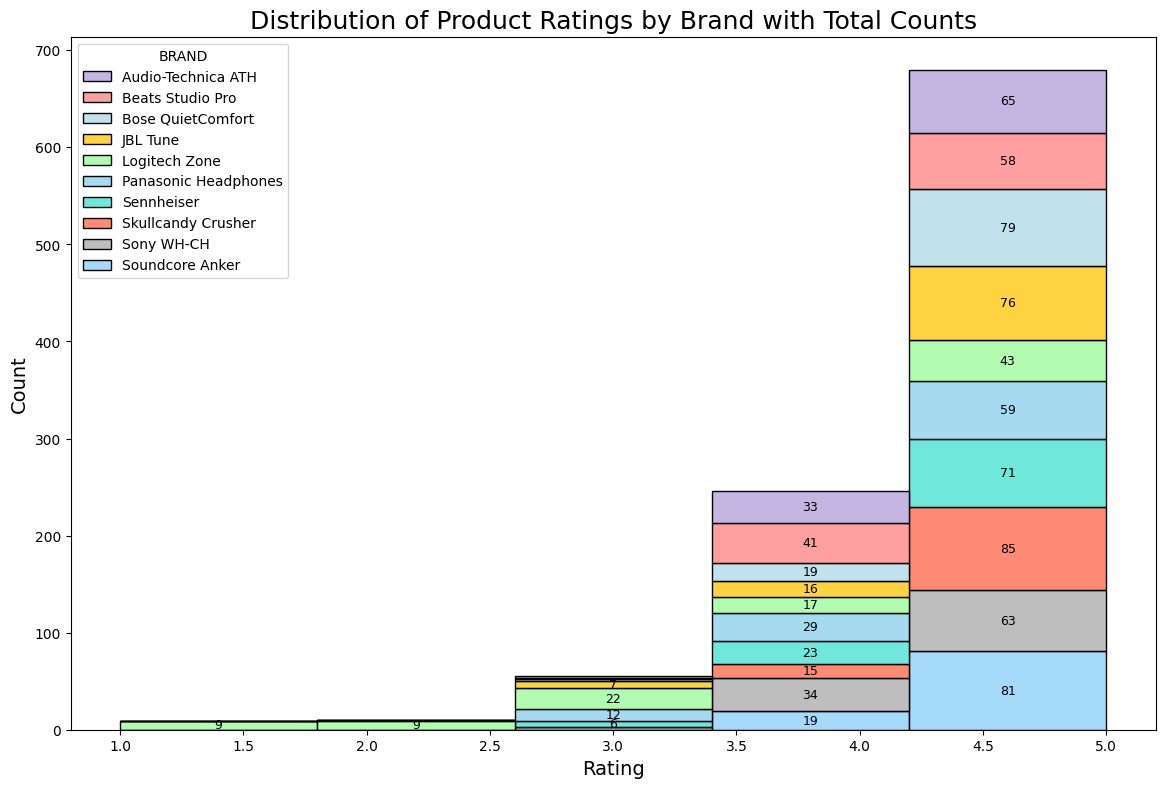

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the brand colors if not already defined
# Assuming brand_colors is already defined as shown in previous examples

# Function to plot a stacked histogram with total counts
def plot_with_total_counts(df: pd.DataFrame) -> None:
    """
    Plot a stacked histogram of product ratings by brand, showing total counts above the bars.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'RATING' and 'BRAND' columns.

    Returns:
    None
    """
    plt.figure(figsize=(14, 9))

    # Plotting the stacked histogram
    ax = sns.histplot(df, x='RATING', hue='BRAND', multiple='stack', palette=brand_colors, bins=5, kde=False)

    # Add total counts inside the bars, only if the height of the bar is large enough
    for p in ax.patches:
        height = p.get_height()
        if height > 5:  # Only annotate if the height of the bar is significant enough
            ax.annotate(f'{int(height)}',  # Label with integer count
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),  # Center vertically in the bar
                        ha='center', va='center', fontsize=9, color='black')

    # Set the title and axis labels
    plt.title('Distribution of Product Ratings by Brand with Total Counts', fontsize=18)
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Display the plot
    plt.show()

# Usage of the function with the main DataFrame
plot_with_total_counts(main_dataframe)

**Product Ratings by KDE**

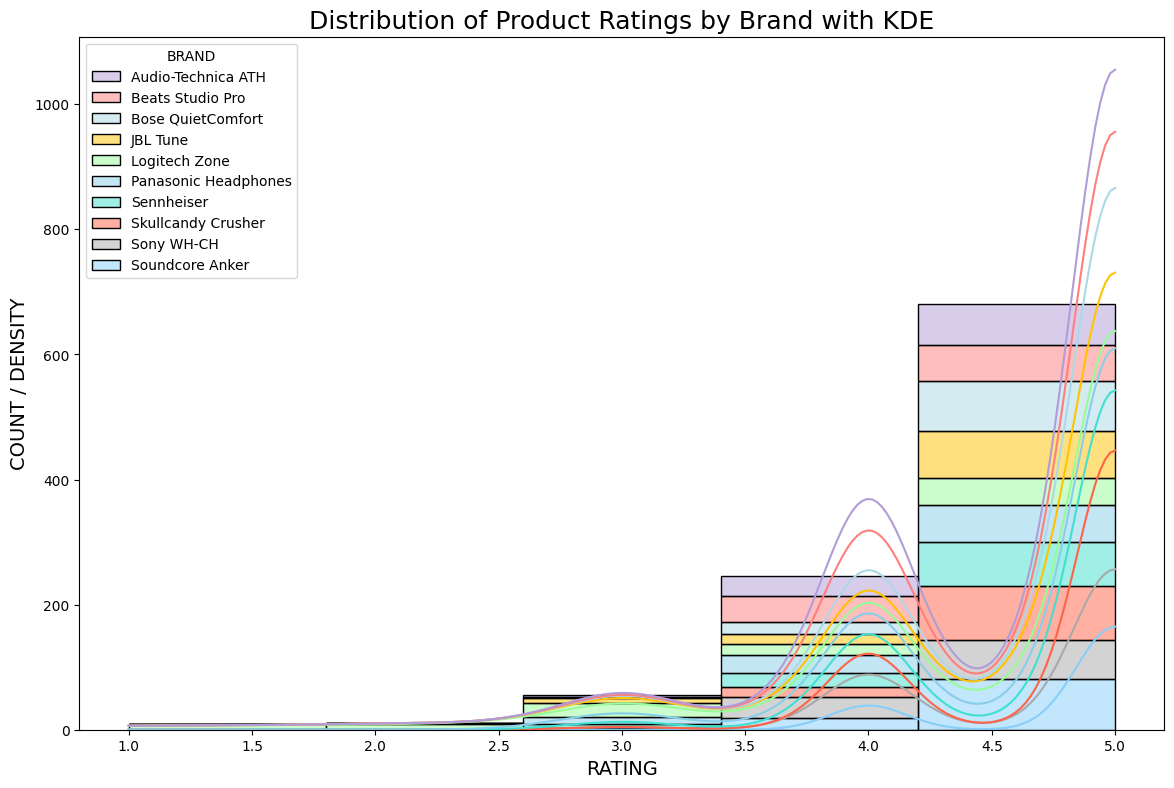

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the brand colors if not already defined
# Assuming brand_colors is already defined as shown in previous examples

# Function to plot a stacked histogram with KDE for product ratings by brand
def plot_histogram_with_kde(df: pd.DataFrame) -> None:
    """
    Plot a stacked histogram of product ratings by brand, with an overlaid KDE (Kernel Density Estimate).

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'RATING' and 'BRAND' columns.

    Returns:
    None
    """
    plt.figure(figsize=(14, 9))

    # Plotting the histogram and KDE together
    sns.histplot(df, x='RATING', hue='BRAND', multiple='stack', palette=brand_colors, bins=5, kde=True)

    # Set the title and axis labels
    plt.title('Distribution of Product Ratings by Brand with KDE', fontsize=18)
    plt.xlabel('RATING', fontsize=14)
    plt.ylabel('COUNT / DENSITY', fontsize=14)

    # Display the plot
    plt.show()

# Usage of the function with the main DataFrame
plot_histogram_with_kde(main_dataframe)

**Description:**
This chart combines a histogram with Kernel Density Estimation (KDE) to illustrate the distribution of product ratings across various headphone brands. The KDE lines provide a smooth estimate of the probability density of the ratings, offering deeper insights into the underlying distribution. This allows for a clearer view of how ratings cluster around certain values and reveals subtle differences in the rating patterns of different brands.

**Unique Insights from KDE:**

1. **Smooth Peaks at 4.0 and 5.0 Ratings:**
   - The KDE lines show clear peaks around the **4.0 and 5.0** rating marks, confirming that most brands receive high ratings. The KDE smooths out the transitions between rating categories, making it easier to identify trends across different brands.

2. **Brand-Specific Rating Concentrations:**
   - **Audio-Technica ATH** (purple) shows a distinct spike at **4.0 stars**, indicating a significant portion of its ratings are concentrated here.
   - **Skullcandy Crusher** (orange-red) and **Soundcore Anker** (blue) have well-defined KDE peaks near **5 stars**, highlighting strong customer satisfaction for these brands.

3. **Minor Rating Variability Below 3.0 Stars:**
   - The KDE lines for ratings below **3.0** are minimal, suggesting that very few customers rate these products poorly. The flatness of the KDE in this region reflects the low frequency of negative reviews.

4. **Multiple Modes for Some Brands:**
   - Brands like **Logitech Zone** and **Panasonic Headphones** have slightly more complex KDE curves, showing potential for multiple modes (peaks), particularly around the **3.0** and **4.0** rating marks. This indicates a more diverse range of customer feedback for these brands compared to others with single, concentrated peaks.

This combination of histogram and KDE provides a richer understanding of rating distributions by adding a layer of density estimation, which smooths out the sharp transitions seen in a typical histogram, making the underlying trends more evident.

### 5.3 Descriptive Statistics

**Calculating Variance of Numerical Columns**

In [ ]:
# Function to calculate variance for numerical columns
def calculate_variance(df: pd.DataFrame) -> pd.Series:
    """
    Calculate and return the variance for numerical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
    pd.Series: The variance values for the numerical columns.
    """
    variance_values = df.var(numeric_only=True)
    print("Variance values:")
    print(variance_values)
    return variance_values

# Usage of the function
variance_values = calculate_variance(main_dataframe)

Variance values:
RATING              0.522438
IS_VERIFIED         0.000000
HELPFUL_COUNT    3095.966224
dtype: float64


- This code calculates the variance for all numerical columns in the DataFrame, offering insights into the spread and how much values deviate from the mean across the dataset.

**Calculating Interquartile Range (IQR) of Numerical Columns**

In [ ]:
# Function to calculate the Interquartile Range (IQR) for numerical columns
def calculate_iqr(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate and return the Interquartile Range (IQR) for numerical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
    pd.DataFrame: A DataFrame containing the IQR values for numerical columns.
    """
    # Select only numerical columns for IQR calculation (excluding boolean columns)
    numeric_cols = df.select_dtypes(include=['number'])

    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    print("Interquartile Range (IQR) values:")
    print(IQR)
    return IQR

# Usage of the function
iqr_values = calculate_iqr(main_dataframe)

Interquartile Range (IQR) values:
RATING           1.0
HELPFUL_COUNT    1.0
dtype: float64


- This code computes the Interquartile Range (IQR) for the numerical columns, providing an understanding of the data distribution within the middle 50% and helping to identify potential outliers.

**Calculating Skewness of Numerical Columns**

In [ ]:
# Function to calculate skewness for numerical columns
def calculate_skewness(df: pd.DataFrame) -> pd.Series:
    """
    Calculate and return the skewness for numerical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical data.

    Returns:
    pd.Series: The skewness values for the numerical columns.
    """
    # Select only numerical columns for skewness calculation
    numeric_cols = df.select_dtypes(include=['number'])

    skewness_values = numeric_cols.skew()

    print("Skewness values:")
    print(skewness_values)
    return skewness_values

# Usage of the function
skewness_values = calculate_skewness(main_dataframe)

Skewness values:
RATING          -2.114562
HELPFUL_COUNT    6.692976
dtype: float64


- This code calculates the skewness of the numerical columns, determining whether the data is symmetrically distributed or skewed to the left or right, revealing any asymmetry in the dataset.

**Key Findings from Descriptive Statistics**

**1. Variance Analysis:**
- **RATING**: The variance for the `RATING` is **0.522**, indicating that customer ratings are relatively consistent with minor deviations around the mean.
- **IS_VERIFIED**: The variance for `IS_VERIFIED` is **0**, which is expected as this is a binary variable.
- **HELPFUL_COUNT**: With a variance of **3095.97**, the `HELPFUL_COUNT` shows substantial variation, suggesting that customer engagement (via helpfulness votes) varies significantly across reviews.

**2. Interquartile Range (IQR) Analysis:**
- **RATING**: The IQR for `RATING` is **1.0**, signifying a relatively narrow spread of ratings between the first and third quartile, suggesting that most ratings cluster within a similar range.
- **HELPFUL_COUNT**: The IQR for `HELPFUL_COUNT` is also **1.0**, indicating that most reviews have similar helpfulness votes, with few reviews receiving significantly higher votes.

**3. Skewness Analysis:**
- **RATING**: The skewness of **-2.11** for `RATING` suggests a left-skewed distribution, meaning the majority of customer ratings tend to be on the higher end (positive feedback).
- **HELPFUL_COUNT**: The skewness of **6.69** for `HELPFUL_COUNT` indicates a highly right-skewed distribution, where most reviews have lower helpfulness votes, but a small number of reviews receive significantly higher votes.

**Summary of Trends:**
- **Customer Ratings**: Most customers provide high ratings, as shown by the left-skewed distribution and low variance.
- **Helpfulness Votes**: Helpfulness votes vary significantly, with a few reviews standing out due to high engagement. This wide variation is evident from the high variance and skewness in the `HELPFUL_COUNT`.

## 6. Sentiment Analysis

### 6.1 Methodology

**Methodology: Sentiment Analysis Techniques**

**1. TextBlob Sentiment Analysis:**
TextBlob is a Python library that offers a straightforward API for natural language processing (NLP) tasks, including sentiment analysis. It leverages the Pattern library to perform sentiment analysis using a rule-based approach to calculate sentiment polarity.

- **Polarity**: Sentiment is measured on a polarity scale ranging from -1 (very negative) to 1 (very positive), with 0 indicating neutral sentiment. Polarity is computed based on predefined lexicons, where each word has an assigned sentiment score, and the overall sentiment of the text is determined by summing and normalizing these scores.

**Methodology**:
- Each word in a review is matched against a sentiment lexicon.
- The overall sentiment score is the sum of individual word scores, normalized between -1 and 1.
- Sentiment is then classified as Positive (polarity > 0), Negative (polarity < 0), or Neutral (polarity = 0).

**Use Case**:
TextBlob is effective for basic sentiment analysis, particularly in general-purpose texts where complex linguistic handling, such as negation or informal slangs, is not critical.

**2. NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner):**
NLTK (Natural Language Toolkit) includes VADER, a sentiment analysis tool optimized for social media and short informal texts. VADER utilizes a lexicon-based approach, similar to TextBlob, but incorporates additional heuristics to handle intensifiers, negations, and punctuation that influence sentiment.

- **Polarity**: VADER generates a compound sentiment score normalized between -1 (most negative) and 1 (most positive). It also produces separate scores for positive, negative, and neutral sentiments within the text.

**Methodology**:
- VADER’s lexicon is specifically designed for informal language, commonly used in social media and reviews.
- The algorithm recognizes intensity modifiers like "extremely" or "very," which enhance the sentiment's strength.
- It handles negations (e.g., "not good") to appropriately flip the sentiment to negative.
- The overall sentiment is calculated by summing word-level scores and accounting for intensifiers and negations.

**Use Case**:
VADER is ideal for sentiment analysis in reviews, social media posts, and other short informal texts, as it has been fine-tuned to capture linguistic nuances such as sarcasm, punctuation, and intensifiers.

**Comparison**:
- **TextBlob** offers a simpler, rule-based sentiment analysis method, making it easy to implement but less sophisticated in dealing with complex language structures like negation and punctuation.
- **VADER (NLTK)** is more robust for informal text sentiment analysis, offering higher accuracy for data involving intensifiers, punctuation, and negations, making it particularly suitable for social media and product review analysis.

**In Summary**:
TextBlob is useful for basic sentiment analysis tasks, while NLTK’s VADER provides more advanced sentiment detection, especially in informal contexts like product reviews and social media posts.

### 6.2 Results

**TextBlob Sentiment Analysis**

In [ ]:
# Import necessary library
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text: str) -> float:
    """
    Calculate the sentiment polarity of a given text using TextBlob.

    Parameters:
    text (str): The text to analyze.

    Returns:
    float: Sentiment polarity (-1 to 1).
    """
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis on the review content
main_dataframe['POLARITY'] = main_dataframe['CONTENT'].apply(get_sentiment)

# Categorize sentiment into Positive, Neutral, and Negative based on polarity
main_dataframe['SENTIMENT'] = main_dataframe['POLARITY'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Showing the first few rows to verify the result
main_dataframe[['CONTENT', 'POLARITY', 'SENTIMENT']].head()

,CONTENT,POLARITY,SENTIMENT
0,"If you've ever been in a studio, chances are y...",0.294804,Positive
1,"So I got these yesterday, and I know I am not ...",0.264460,Positive
2,I'm not a mega audiophile but wants some wired...,0.403680,Positive
3,These headphones are amazing. I only have smal...,0.365841,Positive
4,Looking for a budget friendly pair of headphon...,0.218368,Positive


- This code uses the TextBlob library to calculate the sentiment polarity of product reviews, classifying them as Positive, Negative, or Neutral based on the polarity score.

**NLTK VADER Sentiment Analysis**

In [ ]:
# Import necessary libraries
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Using VADER
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment polarity using NLTK's VADER
def get_nltk_sentiment(text: str) -> float:
    """
    Calculate sentiment polarity using NLTK's VADER sentiment analyzer.

    Parameters:
    text (str): The text to analyze.

    Returns:
    float: Sentiment polarity score (-1 to 1).
    """
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # VADER returns a 'compound' score between -1 (negative) to 1 (positive)

# Apply sentiment analysis on the review content
main_dataframe['POLARITY_NLTK'] = main_dataframe['CONTENT'].apply(get_nltk_sentiment)

# Categorize sentiment into Positive, Neutral, and Negative based on polarity
main_dataframe['SENTIMENT_NLTK'] = main_dataframe['POLARITY_NLTK'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Showing the first few rows to verify the result
main_dataframe[['CONTENT', 'POLARITY_NLTK', 'SENTIMENT_NLTK']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,CONTENT,POLARITY_NLTK,SENTIMENT_NLTK
0,"If you've ever been in a studio, chances are y...",0.9761,Positive
1,"So I got these yesterday, and I know I am not ...",0.9995,Positive
2,I'm not a mega audiophile but wants some wired...,0.9966,Positive
3,These headphones are amazing. I only have smal...,0.9861,Positive
4,Looking for a budget friendly pair of headphon...,0.9990,Positive


- This code utilizes NLTK's VADER sentiment analyzer, which is tailored for social media and informal text, to compute sentiment polarity and categorize reviews as Positive, Negative, or Neutral.

**Top Positive and Negative Reviews for Beats by Dre**

In [ ]:
# Function to get top 5 positive and negative reviews, and overall sentiment for Beats by Dre
def analyze_beats_sentiment(df: pd.DataFrame, brand: str) -> None:
    """
    Display the top 5 positive and top 5 negative reviews, and the overall sentiment for a specific brand.

    Parameters:
    df (pd.DataFrame): The DataFrame containing sentiment data.
    brand (str): The brand to filter by (e.g., 'Beats Studio Pro').

    Returns:
    None
    """
    # Filter the DataFrame for the specified brand
    brand_df = df[df['BRAND'] == brand]

    # Sort by polarity to get the top 5 positive and negative reviews
    top_5_positive = brand_df.nlargest(5, 'POLARITY_NLTK')[['CONTENT', 'POLARITY_NLTK', 'SENTIMENT_NLTK']]
    top_5_negative = brand_df.nsmallest(5, 'POLARITY_NLTK')[['CONTENT', 'POLARITY_NLTK', 'SENTIMENT_NLTK']]

    # Overall sentiment breakdown for the brand
    sentiment_counts = brand_df['SENTIMENT_NLTK'].value_counts()

    # Display the results
    print(f"Top 5 Positive Reviews for {brand}:")
    print(top_5_positive)
    print("\n" + "-"*50)

    print(f"Top 5 Negative Reviews for {brand}:")
    print(top_5_negative)
    print("\n" + "-"*50)

    print(f"Overall Sentiment Distribution for {brand}:")
    print(sentiment_counts)

# Usage to analyze Beats by Dre (Beats Studio Pro)
analyze_beats_sentiment(main_dataframe, 'Beats Studio Pro')

Top 5 Positive Reviews for Beats Studio Pro:
                                               CONTENT  POLARITY_NLTK  \
101  I loved my Beats Solo headphones as a teenager...         0.9994   
100  My earliest forays into a More expensive headp...         0.9993   
111  Long story short:Not what I was expecting, and...         0.9988   
102  Immerse yourself in a world of unparalleled au...         0.9983   
116  Highs: Beats > Sennheiser.High frequencies are...         0.9981   

    SENTIMENT_NLTK  
101       Positive  
100       Positive  
111       Positive  
102       Positive  
116       Positive  

--------------------------------------------------
Top 5 Negative Reviews for Beats Studio Pro:
                                               CONTENT  POLARITY_NLTK  \
154  Please read this review if you are thinking of...        -0.9803   
143  Got these on Prime Day. The price was too good...        -0.6022   
184  Cancelación de ruido perfecta, micrófono en ll...        -0.5994   
1

- This code identifies the top 5 positive and top 5 negative reviews for Beats by Dre (Beats Studio Pro), along with an overall sentiment breakdown for the brand, using the sentiment analysis results.

**Sentiment Polarity Distribution**

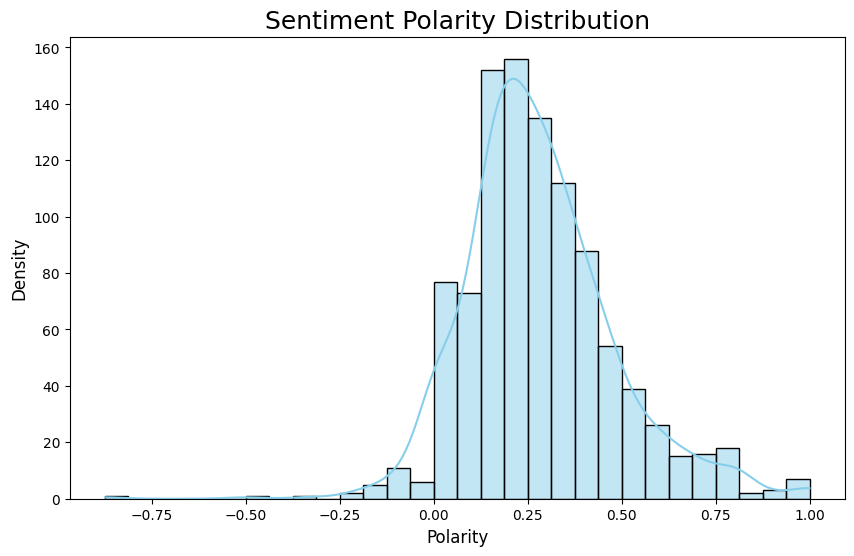

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Plotting the distribution of sentiment polarity with KDE
sns.histplot(main_dataframe['POLARITY'], bins=30, kde=True, color='#87CEEB')  # Soft blue color for aesthetics

# Set title and labels for the plot
plt.title('Sentiment Polarity Distribution', fontsize=18)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

**Description:**
The chart represents the distribution of sentiment polarity across all product reviews. Sentiment analysis was applied to calculate the polarity score for each review, with values ranging from **-1.0** (most negative) to **1.0** (most positive). A **Kernel Density Estimation (KDE)** curve is overlaid on the histogram to provide a smooth representation of the underlying distribution, while the histogram itself offers a granular view of sentiment dispersion.

**Key Insights:**

1. **Positive Skew:**
   - The distribution shows a clear **positive skew**, with the majority of reviews having sentiment scores greater than **0.0**. This indicates that most customers expressed a favorable opinion about the products.

2. **Neutral to Slightly Positive Sentiment:**
   - A noticeable peak occurs around a polarity score of **0.2**, suggesting that while many reviews are positive, they are not overwhelmingly so. These reviews likely include balanced feedback that combines praise with constructive criticism.

3. **Minimal Negative Sentiment:**
   - The distribution’s left tail is small, indicating that only a few reviews have **negative sentiment**. This points to a high level of customer satisfaction across the product range.

4. **Smooth KDE Curve:**
   - The **KDE curve** confirms the smoothness of the sentiment distribution, with few extreme outliers. Most reviews tend to fall within the positive polarity range, further reinforcing the overall positive sentiment trend.

This visualization offers valuable insights into the general tone of customer feedback, providing a comprehensive view of how sentiments are distributed across positive, neutral, and negative categories in the dataset.

**Average Sentiment Rating by Polarity**

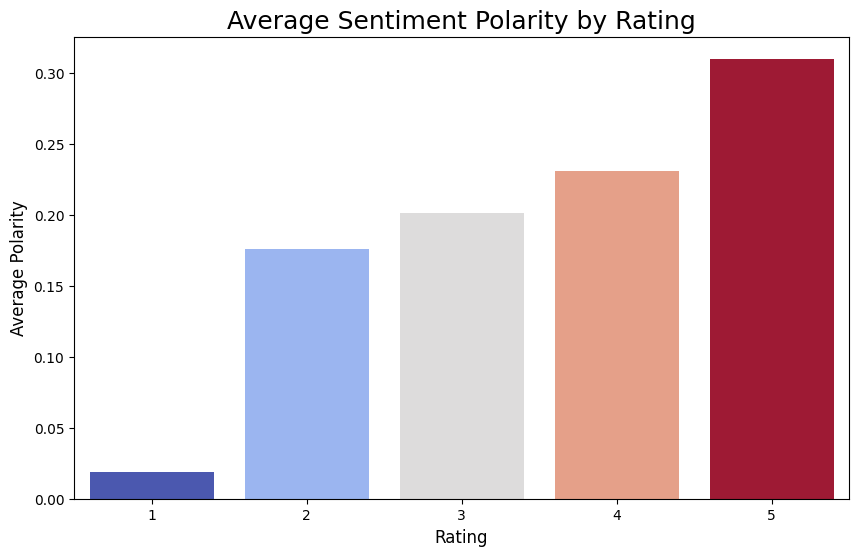

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Group by rating and calculate mean polarity
sentiment_by_rating = main_dataframe.groupby('RATING')['POLARITY'].mean().reset_index()

# Bar plot with hue as 'RATING' and a color palette
sns.barplot(x='RATING', y='POLARITY', data=sentiment_by_rating, hue='RATING', palette='coolwarm', dodge=False, legend=False)

# Set title and labels for the plot
plt.title('Average Sentiment Polarity by Rating', fontsize=18)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Polarity', fontsize=12)

# Show the plot
plt.show()

**Description:**
This bar chart illustrates the average sentiment polarity associated with each rating level, ranging from **1.0 to 5.0 stars**. The sentiment polarity score measures the emotional tone of customer reviews, with values from **-1.0** (most negative) to **1.0** (most positive). The average polarity at each rating level reflects the overall sentiment of customers as they rate the products across different rating scales.

**Key Insights:**

1. **Positive Correlation Between Ratings and Sentiment:**
   - There is a clear positive correlation between **higher ratings** and **more positive sentiment**. As the rating increases from **1.0 to 5.0 stars**, the sentiment polarity also rises, with **5-star** reviews having the highest average sentiment polarity.
   - Reviews with **5 stars** exhibit the most positive average sentiment, reinforcing that higher ratings are associated with more favorable customer experiences.

2. **Negative to Neutral Sentiment for Lower Ratings:**
   - **1-star** and **2-star** ratings have a negative average sentiment polarity, indicating dissatisfaction or negative experiences. **3-star** reviews, on the other hand, tend to show neutral sentiment, suggesting a balance of both positive and negative feedback.

3. **Strongly Positive Sentiment for 4 and 5-Star Ratings:**
   - Reviews with **4-star** and **5-star** ratings reflect significantly positive sentiment polarity, with **5-star reviews** having the highest positivity. This trend suggests that customers who give higher ratings are overwhelmingly satisfied, both in their ratings and emotional tone.

4. **Color Gradient for Enhanced Visualization:**
   - The use of a **coolwarm color palette** adds visual impact, with cooler tones representing lower polarity and warmer tones indicating higher, more positive sentiment.

This visualization effectively highlights the relationship between star ratings and customer sentiment, confirming that higher ratings are consistently associated with more positive feedback and emotional responses.

**Sentiment Distribution of Customer Reviews**

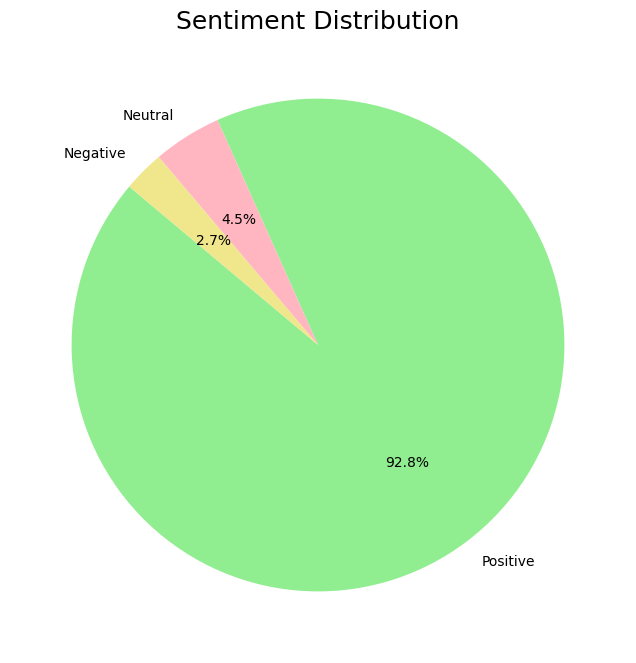

In [ ]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.figure(figsize=(8, 8))

# Get the value counts for sentiment categories
sentiment_counts = main_dataframe['SENTIMENT'].value_counts()

# Plot the pie chart for sentiment distribution
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',  # Show percentage on pie slices
    startangle=140,  # Rotate the chart for better appearance
    colors=['#90EE90', '#FFB6C1', '#F0E68C']  # Soft green, pink, and yellow colors for positive, negative, neutral
)

# Set the title for the chart
plt.title('Sentiment Distribution', fontsize=18)

# Display the pie chart
plt.show()

**Description:**
The pie chart visually represents the overall distribution of sentiment across all customer reviews. Sentiments are categorized as **Positive**, **Neutral**, and **Negative**, based on their polarity scores, and the chart shows the proportion of each sentiment category as a percentage of the total reviews.

**Key Insights:**

1. **Prevalence of Positive Sentiment:**
   - **Positive reviews** dominate the sentiment distribution, making up the largest percentage of total reviews. This indicates that the majority of customers express satisfaction with the products.

2. **Smaller Proportion of Neutral and Negative Sentiments:**
   - **Neutral reviews** account for a smaller yet notable portion, reflecting customers who had mixed or balanced feedback.
   - **Negative reviews** represent the smallest percentage, indicating that only a limited number of customers had strongly negative experiences with the products.

3. **Effective Visual Representation:**
   - The use of soft, distinct colors such as **light green** for positive, **light pink** for negative, and **light yellow** for neutral sentiments enhances visual clarity, making it easy to differentiate between sentiment categories.

This chart provides a high-level overview of the emotional tone in customer feedback, offering a quick yet comprehensive snapshot of overall satisfaction levels.

**Word Clouds for Positive and Negative Reviews**

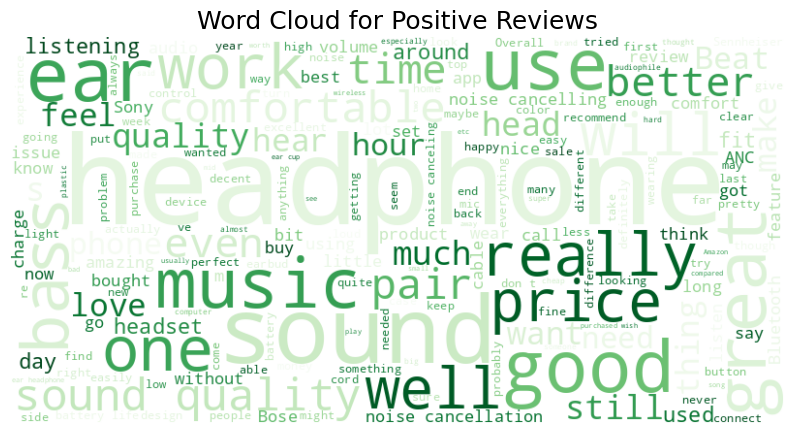

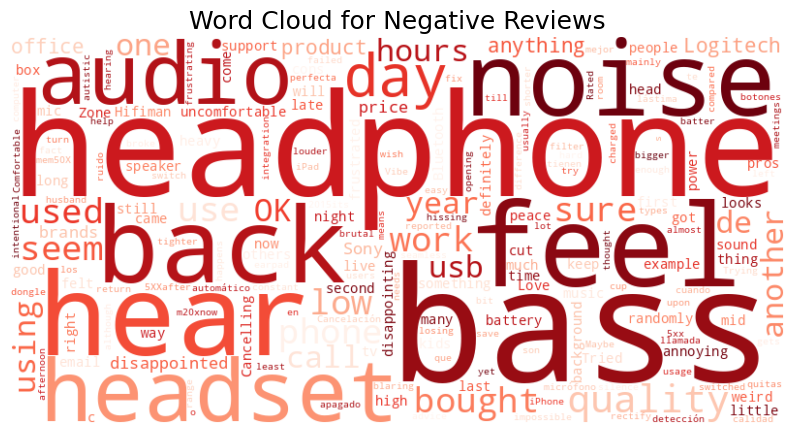

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for Positive Reviews
positive_reviews = " ".join(review for review in main_dataframe[main_dataframe['SENTIMENT'] == 'Positive']['CONTENT'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_reviews)

# Plotting the positive word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Positive Reviews', fontsize=18)
plt.show()

# WordCloud for Negative Reviews
negative_reviews = " ".join(review for review in main_dataframe[main_dataframe['SENTIMENT'] == 'Negative']['CONTENT'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

# Plotting the negative word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Negative Reviews', fontsize=18)
plt.show()

**Description:**
These word clouds visually represent the most frequently occurring words in both **Positive** and **Negative** customer reviews. The size of each word corresponds to its frequency of appearance, with larger words appearing more often in the reviews. These visualizations offer insights into the key themes and sentiments expressed in both positive and negative feedback.

**Key Words from Positive Reviews:**
The most frequently mentioned words in **Positive reviews** include:
- **headphone**
- **sound**
- **ear**
- **good**
- **great**
- **use**
- **music**
- **bass**
- **one**
- **work**

These terms suggest that customers are generally satisfied with the headphones’ sound quality, usability, and bass performance, often describing their experience as **good** or **great**.

**Key Words from Negative Reviews:**
In contrast, the most frequent words in **Negative reviews** are:
- **bass**
- **headphone**
- **hear**
- **feel**
- **back**
- **noise**
- **headset**
- **audio**
- **day**
- **quality**

Negative reviews tend to focus on issues such as **bass**, **hearing**, **noise**, and **audio quality**, indicating dissatisfaction with the feel or performance of these features.

**Visual Presentation:**
- The **Positive word cloud** uses a green color palette, symbolizing the favorable feedback associated with these terms.
- The **Negative word cloud** employs a red color palette, reflecting the concerns and criticisms highlighted by customers.

These word clouds provide a quick and intuitive way to grasp the main themes in customer sentiment, revealing distinct patterns for both positive and negative experiences.

## 7. AI-Generated Insights

### 7.1 Using Gemini AI

**Utilization of Gemini AI for Insight Extraction:**

We employed **Gemini's 1.5 Flash Modal** to perform an in-depth analysis of customer reviews for each product. This allowed us to efficiently process large volumes of review data and extract key insights. **Gemini AI** was further utilized to categorize and separate the reviews by product, identifying specific themes such as **pros and cons** mentioned by customers.

The AI-driven categorization enabled us to:
1. **Cluster reviews** based on sentiment, making it easier to identify patterns in customer satisfaction or dissatisfaction.
2. **Extract actionable insights** by pinpointing the most commonly highlighted positive and negative attributes for each product, which in turn helped inform our product performance evaluation.

By leveraging Gemini AI, we were able to automate and streamline the sentiment analysis process, providing a more detailed and structured understanding of customer feedback across all products.

**The Complete Code**

In [ ]:
import pandas as pd
import google.generativeai as genai
from concurrent.futures import ThreadPoolExecutor, as_completed

class ReviewAnalyzer:
    """
    A class to analyze consumer reviews using the Gemini AI model.
    """

    def __init__(self, api_key, model_name="gemini-1.5-flash"):
        """
        Initialize the ReviewAnalyzer with the given API key and model name.

        Args:
            api_key (str): The API key for accessing the Gemini AI model.
            model_name (str): The name of the Gemini AI model to use.
        """
        # Configure the API with the provided key.
        genai.configure(api_key=api_key)

        # Initialize the model with the specified model name and generation configuration.
        self.model = genai.GenerativeModel(
            model_name=model_name,
            generation_config={
                "temperature": 1,
                "top_p": 0.95,
                "top_k": 64,
                "max_output_tokens": 8192,
                "response_mime_type": "text/plain",
            },
        )

    @staticmethod
    def load_reviews(file_path, content_column='CONTENT'):
        """
        Load reviews from a CSV file.

        Args:
            file_path (str): The path to the CSV file containing reviews.
            content_column (str): The name of the column containing review texts.

        Returns:
            list: A list of review strings.
        """
        try:
            # Read the CSV file into a DataFrame.
            df = pd.read_csv(file_path)
            # Extract the reviews from the specified column and convert them to a list.
            reviews = df[content_column].tolist()
            return reviews
        except Exception as e:
            # Handle any exceptions that occur during file loading.
            print(f"Error loading reviews from {file_path}: {e}")
            return []

    def analyze_reviews(self, reviews, batch_size=100, max_workers=5):
        """
        Analyze the provided reviews in batches and summarize key insights.

        Args:
            reviews (list): A list of review strings.
            batch_size (int): The number of reviews to process in each batch.
            max_workers (int): The maximum number of worker threads to use.

        Returns:
            str: A concatenated string of all batch summaries.
        """
        # Prepare the batches of reviews.
        batches = [reviews[i:i + batch_size] for i in range(0, len(reviews), batch_size)]

        # Define the worker function for processing each batch.
        def process_batch(batch, batch_number):
            # I start a new chat session for this batch to ensure thread safety.
            chat_session = self.model.start_chat(history=[])

            # Construct the prompt for the batch.
            prompt = (
                "You are an Expert Data, Insights, and Sentiment Analyst with 20+ years of experience. "
                "These are reviews of 10 headphones taken from an e-commerce website. "
                "Analyze these reviews and summarize the key points, focusing on customer satisfaction, "
                "common themes, and key feedback: \n\n" + "\n\n".join(batch)
            )

            try:
                # Send the prompt to the model and get the response.
                response = chat_session.send_message(prompt)
                return response.text
            except Exception as e:
                # Handle any exceptions that occur during the API call.
                print(f"Error processing batch {batch_number}: {e}")
                return f"Error occurred while processing batch {batch_number}."

        # Use ThreadPoolExecutor to process batches in parallel.
        insights = []
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            # Submit all the batch processing tasks to the executor.
            future_to_batch = {executor.submit(process_batch, batch, idx+1): idx for idx, batch in enumerate(batches)}
            for future in as_completed(future_to_batch):
                idx = future_to_batch[future]
                try:
                    # Retrieve the result from the future.
                    batch_insight = future.result()
                except Exception as e:
                    # Handle any exceptions that occur during result retrieval.
                    print(f"Batch {idx+1} generated an exception: {e}")
                    batch_insight = f"Error occurred while processing batch {idx+1}."
                # Collect the insights along with their batch indices.
                insights.append((idx, batch_insight))

        # Sort the insights based on batch index to maintain the original order.
        insights.sort(key=lambda x: x[0])
        # Extract the insights and concatenate them.
        all_insights = [insight for idx, insight in insights]
        return "\n\n".join(all_insights)

if __name__ == "__main__":
    # Set the API key.
    api_key = 'API KEY HERE'

    # Create an instance of ReviewAnalyzer.
    analyzer = ReviewAnalyzer(api_key)

    # Load the reviews from the CSV file.
    reviews = analyzer.load_reviews('CleanedReviewsData.csv')

    # Analyze the reviews using the analyzer.
    insights = analyzer.analyze_reviews(reviews, batch_size=100, max_workers=5)

    # Print the insights.
    print(insights)

### 7.2 Key Insights

###**Audio-Technica ATH-M20x Headphones**

The Audio-Technica ATH-M20x headphones are widely praised for their **value** and **balanced sound quality**, offering more than expected for their price.

**Customer Satisfaction:**
- **Positive:** Excellent sound clarity, comfort for short sessions, and sturdy build.
- **Negative:** Discomfort with prolonged use, headband durability, and non-detachable cable.

**Key Insights:**
- **Sound Quality:** Praised for clarity and balance, especially for studio work.
- **Comfort:** Generally good, but some report discomfort after long use.
- **Durability:** Considered sturdy but concerns about the headband's durability.
- **Cable:** The long, non-detachable cable is a drawback for portability.

**Conclusion:** A top choice for budget-conscious users seeking accurate sound for studio or casual listening, with minor trade-offs in comfort and cable design.

###**Beats Studio Pro Headphones**

The Beats Studio Pro headphones receive **positive feedback**, particularly for **sound quality**, **comfort**, and **battery life**, with seamless **Apple integration**.

**Key Insights:**
- **Sound Quality:** Improved over previous models, with balanced audio and good instrument separation.
- **Comfort:** Comfortable for short to moderate use; fit issues for larger heads.
- **Noise Cancellation:** Effective but not top-tier; transparency mode is well-received.
- **Battery Life & Apple Integration:** Impressive battery life and seamless device connectivity.
- **Build Quality:** Sturdy, but prone to fingerprints and minor durability concerns.

**Conclusion:** A good option for Apple users, offering solid sound and features, but potential buyers should consider noise cancellation effectiveness and fit.

###**Bose QuietComfort Headphones**

Bose QuietComfort headphones are highly rated for **noise cancellation**, **comfort**, and **sound quality**.

**Key Insights:**
- **Noise Cancellation:** Outstanding across various settings.
- **Sound Quality:** Balanced and customizable via app.
- **Comfort:** Excellent for extended wear, with soft ear cushions.
- **Build Quality:** Generally sturdy but with some durability concerns.

**Conclusion:** A premium choice for those prioritizing noise cancellation and comfort, though the high price and potential durability issues may give pause.

###**JBL Tune 720BT Wireless Headphones**

Customers are satisfied with the JBL Tune 720BT headphones, highlighting their **sound quality**, **comfort**, and **battery life**.

**Key Insights:**
- **Sound Quality:** Good overall, but volume level could be higher.
- **Comfort:** Comfortable fit, though earcups may get warm during use.
- **Battery Life:** Excellent, lasting several days.
- **Value for Money:** Great balance of price and features.

**Conclusion:** A solid budget option for casual listeners, though it lacks active noise cancellation and high volume output.

###**Logitech Zone Vibe 100 Headphones**

Reviews for the Logitech Zone Vibe 100 are mixed, with praise for **comfort** and **multipoint connectivity**, but issues with **disconnections** and **audio quality**.

**Key Insights:**
- **Comfort:** Lightweight and comfortable for long wear.
- **Connectivity:** Multipoint functionality is popular, but users report random disconnections.
- **Audio Quality:** Generally good, though some experience inconsistent quality during calls.

**Conclusion:** While comfortable and feature-rich, connectivity issues and inconsistent audio performance are notable drawbacks.

###**Panasonic Headphones**

Panasonic headphones, particularly the RP-HT21 model, are appreciated for their **sound quality**, **comfort**, and **affordability**.

**Key Insights:**
- **Sound Quality:** Warm and well-balanced, but lacks clarity at high frequencies.
- **Comfort:** Lightweight and comfortable, though some experience discomfort with foam earcups.
- **Durability:** Durable for the price, but some concerns about fragile cords.

**Conclusion:** Excellent value for budget-conscious users, but improvements in durability and comfort could enhance the experience.

###**Sennheiser HD 599 Headphones**

The Sennheiser HD 599 headphones are well-regarded for their **sound quality** and **comfort**, though some concerns exist about build quality.

**Key Insights:**
- **Sound Quality:** Balanced with a wide soundstage, though bass may be excessive for some.
- **Comfort:** Highly comfortable for long listening sessions.
- **Build Quality:** Some concerns about cable durability and frame construction.

**Conclusion:** A strong choice for audiophiles, offering immersive sound and comfort, though potential buyers should be aware of cable issues and sound leakage.

###**Skullcandy Crusher Evo Headphones**

The Skullcandy Crusher Evo headphones are praised for their **powerful bass** and **comfort**, but lack **noise cancellation** and have build quality concerns.

**Key Insights:**
- **Bass Performance:** Exceptional, adjustable bass that appeals to bass enthusiasts.
- **Comfort:** Comfortable fit with long battery life.
- **Build Quality:** Concerns about hinge durability and accessory quality.

**Conclusion:** Ideal for bass lovers seeking an affordable, comfortable option, though lacking in noise cancellation and build quality.

###**Sony WH-CH720N Headphones**

Sony WH-CH720N headphones are highly regarded for their **sound quality**, **noise cancellation**, and **comfort**, especially at their price point.

**Key Insights:**
- **Sound Quality:** Clear and well-balanced, with good bass response.
- **Noise Cancellation:** Effective for daily use, though not as strong as premium models.
- **Comfort & Battery Life:** Comfortable and long-lasting battery.

**Conclusion:** A great value for those seeking quality sound and noise cancellation at a competitive price, with some minor connectivity and build quality concerns.

###**Anker Soundcore Life Q20 Headphones**

The Anker Soundcore Life Q20 headphones offer **excellent value** with **long battery life** and **effective noise cancellation**, though some **connectivity issues** are reported.

**Key Insights:**
- **Battery Life:** Exceptional, often lasting weeks on a single charge.
- **Comfort:** Comfortable for extended wear.
- **Noise Cancellation:** Good for ambient noise, but less effective for voices.
- **Connectivity Issues:** Reports of Bluetooth choppiness and static.

**Conclusion:** A solid budget-friendly choice for casual listeners, with standout battery life and decent noise cancellation, though connectivity issues may affect usability.

### 7.3 Interpretation

The insights gathered from the customer reviews across different headphone brands provide valuable context for evaluating Beats by Dre products, particularly the **Beats Studio Pro** headphones.

**1. Competitive Landscape:**
   - The reviews highlight that competitors like **Bose** and **Sony** are strongly favored for their noise cancellation and sound quality, especially in professional and premium markets. Beats by Dre can leverage this by further refining their own **noise cancellation** features and addressing specific pain points like **fit for larger heads** and **microphone quality** to remain competitive in this segment.

**2. Customer Expectations:**
   - As seen with products like **Skullcandy Crusher Evo** and **Audio-Technica ATH**, customers increasingly value both **sound quality** and **comfort**, but at a range of price points. **Beats Studio Pro** already delivers on sound quality, but focusing on improving **comfort for extended use** and providing better **value-for-money** options (especially during sales) could help capture a larger share of the market.

**3. Apple Ecosystem Advantage:**
   - Unlike other brands, Beats by Dre benefits from its seamless **Apple integration**, which consistently drives positive reviews. Strengthening this integration with more advanced features, such as improved **multi-device connectivity**, will further differentiate Beats from competitors like **Sony** and **JBL**, which rely more on standalone Bluetooth functionality.

**4. Design and Build Quality Considerations:**
   - Several competitors have faced challenges with **build quality**, particularly **plastic durability** and **fingerprint retention** (e.g., **Beats Studio Pro** and **Sony WH-CH720N**). By enhancing the design to minimize these issues and possibly introducing more premium materials, Beats can position itself as both durable and aesthetically appealing, which is a key driver in customer satisfaction.

**5. Addressing Price Perception:**
   - Feedback from various brands indicates that **price sensitivity** is a recurring theme, particularly with high-end models. Customers frequently highlight value-for-money considerations. By offering more competitive pricing strategies or bundling features (e.g., AppleCare, accessories), **Beats by Dre** can better justify their pricing and convert price-conscious customers.

**Conclusion:**
   - The insights provide clear areas where **Beats Studio Pro** can improve, particularly in terms of **noise cancellation**, **comfort**, and **build quality**. Leveraging the brand’s strength in **sound quality** and **Apple integration** while addressing competitor-driven features will enhance its market positioning. By refining these aspects and addressing consumer price concerns, **Beats by Dre** can capture a larger portion of the competitive headphone market.

## 8. Comparative Analysis

### 8.1 Competitor Overview

The following competitors were analyzed in this project, each holding distinct market positions in the headphone industry:

1. **Sony**:
   Sony dominates the market with a 30% share, particularly through its WH-1000XM series, renowned for **top-tier noise cancellation** and **class-leading sound quality**. Sony caters to both audiophiles and casual listeners, positioning itself as a premium brand with products featuring advanced noise control and long battery life.

2. **Bose**:
   Bose remains a leader in the **premium noise-cancelling** segment, especially with its QuietComfort line. Known for its **comfort and superior noise cancellation**, Bose is a top choice among travelers and professionals, emphasizing high-quality noise reduction and reliability.

3. **Sennheiser**:
   Sennheiser appeals to **audiophiles** and music professionals with its focus on **sound precision** and **open-back designs**. While its market share is smaller compared to Sony and Bose, Sennheiser's high-fidelity models are highly regarded for delivering detailed sound.

4. **JBL**:
   JBL, a subsidiary of Harman International, has built a strong reputation in the **budget-to-midrange** segment, offering **bass-heavy sound profiles**. It appeals to a wide consumer base by providing affordable wireless headphones, making it a popular choice among younger users.

5. **Audio-Technica**:
   Audio-Technica is favored by audio professionals for its **balanced sound** and **affordability**. Known for its ATH series, the brand is highly respected in the professional audio community, delivering reliable headphones for studio use.

6. **Skullcandy**:
   Skullcandy targets younger, style-conscious consumers with its **affordable** and **fashionable headphones**. The brand's emphasis on **customizable sound** and strong bass appeal make it popular among casual listeners seeking value.

7. **Panasonic**:
   Panasonic operates in the **budget segment**, offering **value-for-money** products. It appeals to consumers looking for affordable and reliable headphones for everyday use, with a simple and practical design.

8. **Logitech**:
   Logitech is known for its **multi-device connectivity** and products tailored for **professional use**. Its headphones are geared towards productivity, offering reliable Bluetooth connections and clear microphones, making them ideal for office environments.

9. **Anker (Soundcore)**:
   Anker’s Soundcore brand focuses on **budget-friendly wireless headphones** with **long battery life** and **effective noise cancellation**. It provides excellent value to consumers looking for feature-rich, affordable headphones.

Each of these competitors holds a unique position in the market, from premium noise cancellation (Bose, Sony) to affordable, feature-rich options (JBL, Anker), shaping their customer base and product offerings accordingly.

### 8.2 Comparison of Sentiments

**Sentiment Distribution Comparison**

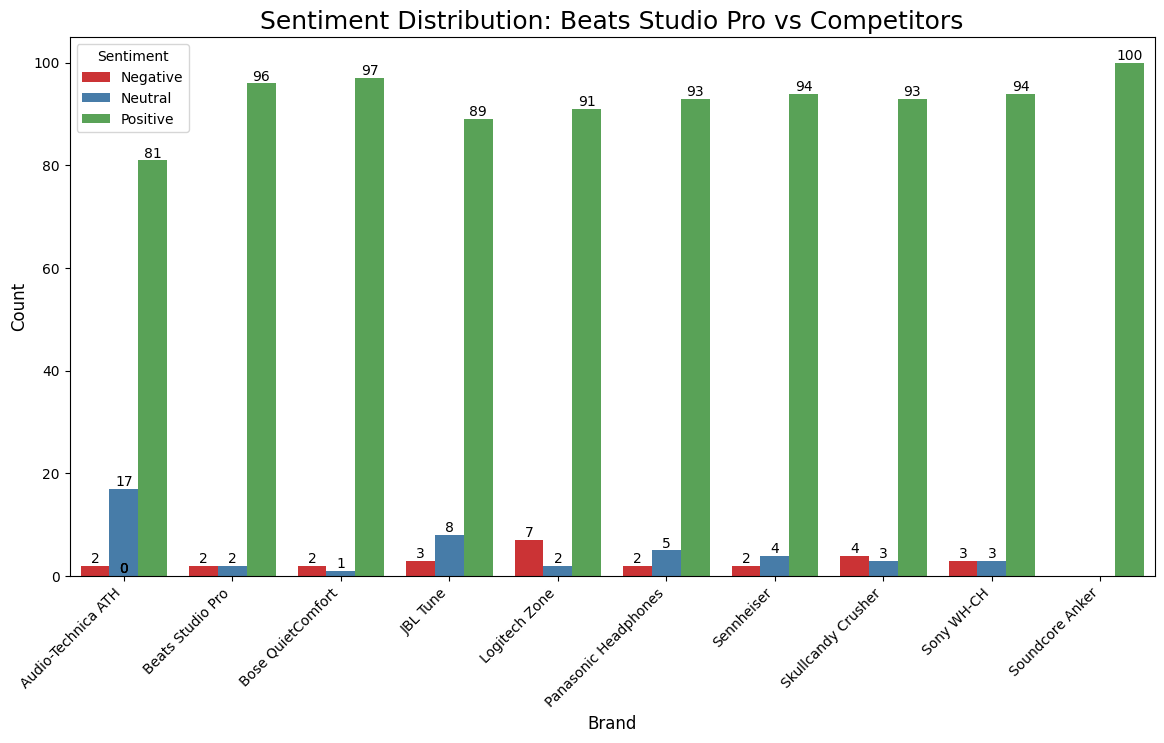

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by BRAND and SENTIMENT to get sentiment distribution
sentiment_distribution = main_dataframe.groupby(['BRAND', 'SENTIMENT']).size().reset_index(name='count')

# Bar plot to compare sentiment distribution across all brands
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='BRAND', y='count', hue='SENTIMENT', data=sentiment_distribution, palette='Set1')

# Annotate the bar plot with review counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),  # X and Y position
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Sentiment Distribution: Beats Studio Pro vs Competitors', fontsize=18)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

- The bar plot includes all competitors in the dataset, showing the distribution of Positive, Neutral, and Negative sentiments for each brand.
The competitors are compared with Beats Studio Pro, providing a comprehensive overview of sentiment distribution.

**Sentiment Polarity Comparison**

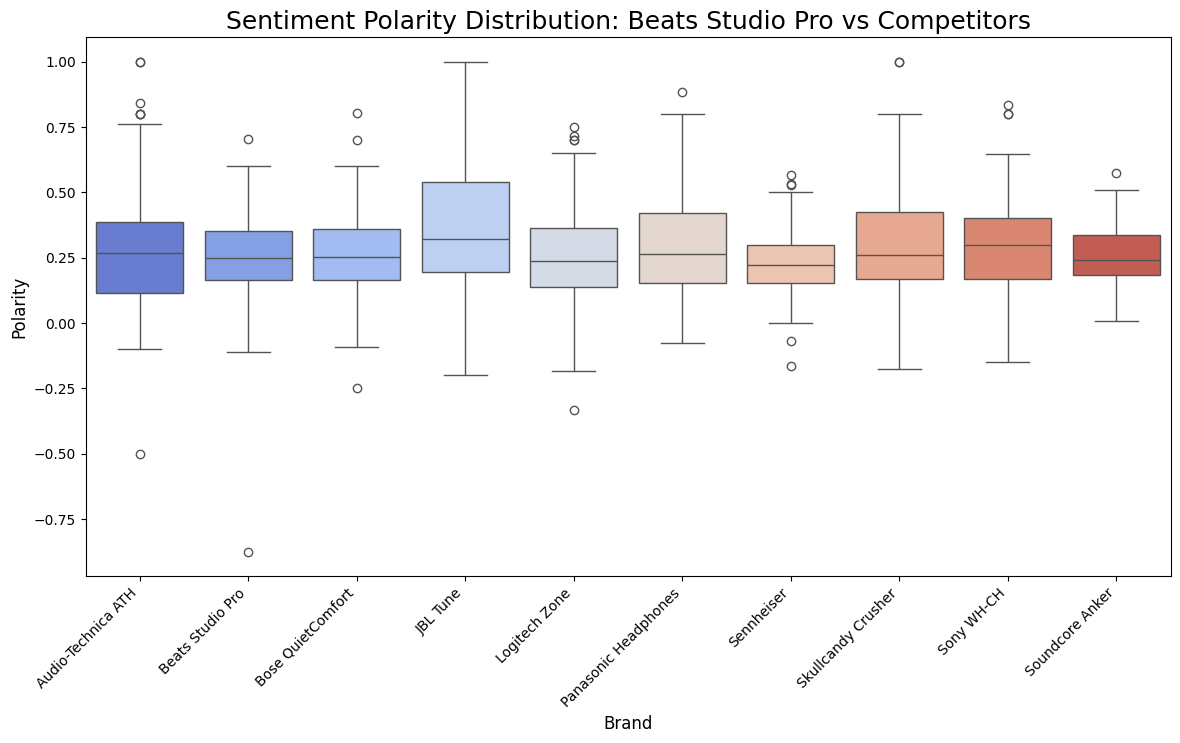

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to compare the distribution of sentiment polarity for each brand
plt.figure(figsize=(14, 7))

# Set hue to 'BRAND' to use the palette correctly and remove the legend
sns.boxplot(x='BRAND', y='POLARITY', data=main_dataframe, hue='BRAND', palette='coolwarm', dodge=False, legend=False)

plt.title('Sentiment Polarity Distribution: Beats Studio Pro vs Competitors', fontsize=18)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

- The box plot shows the spread and central tendency of sentiment polarity for each brand, including all competitors.
We can easily visualize how positive or negative the sentiment is for each brand, comparing it directly to Beats Studio Pro.

**Sentiment Proportion for All Brands**

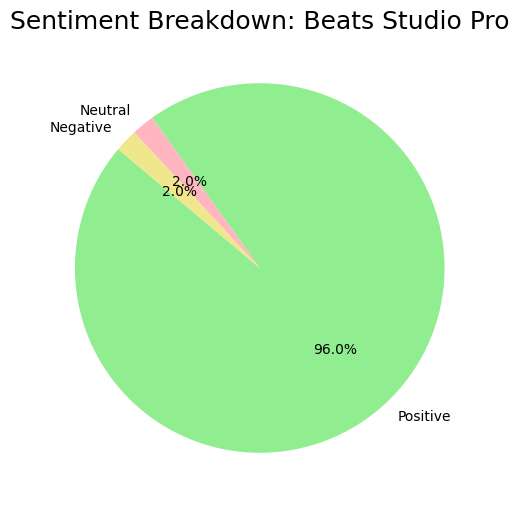

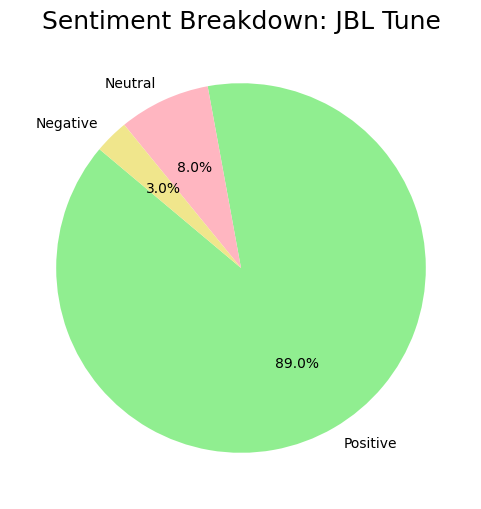

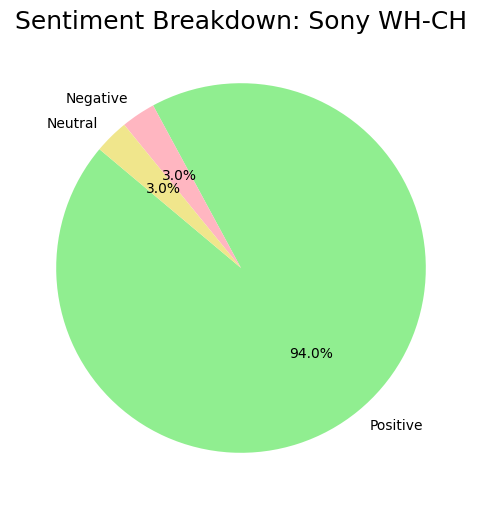

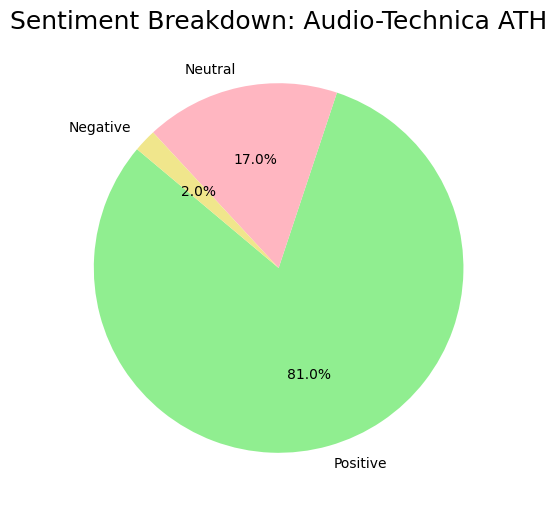

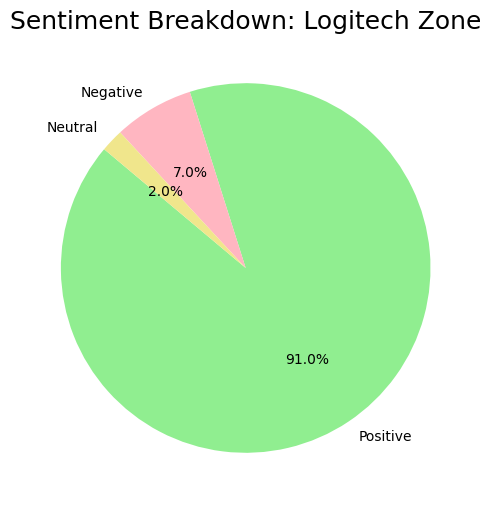

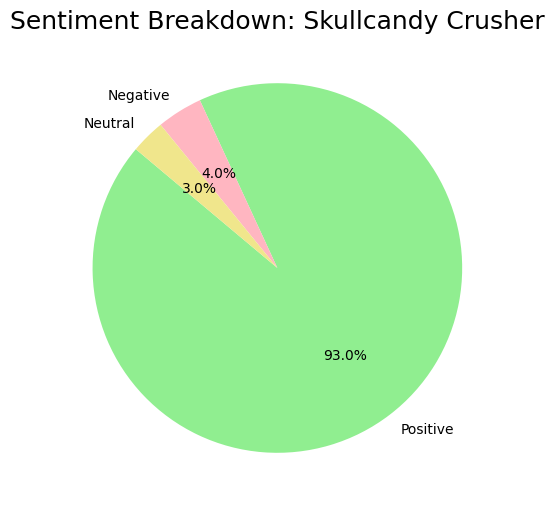

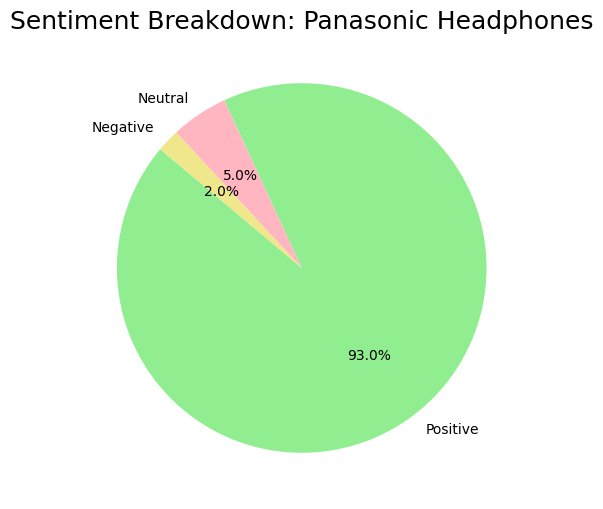

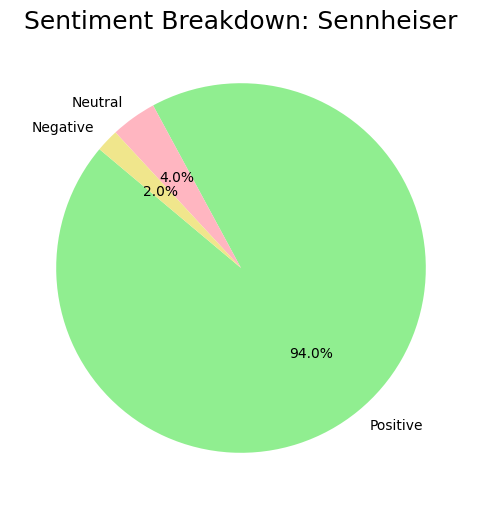

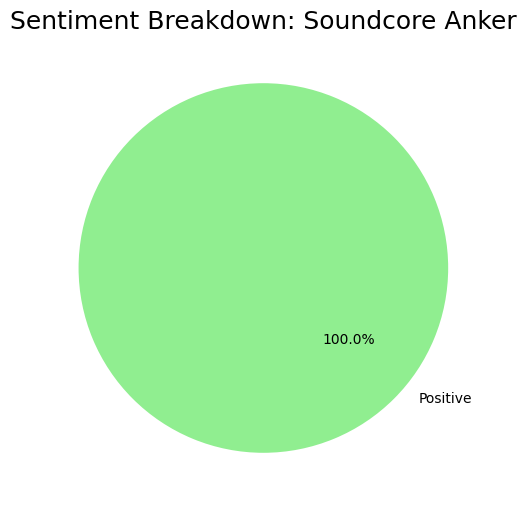

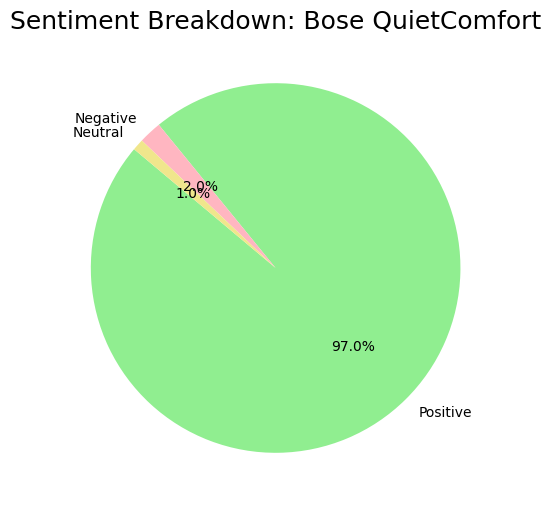

In [ ]:
# List of all brands, including Beats Studio Pro
brands = ['Beats Studio Pro', 'JBL Tune', 'Sony WH-CH', 'Audio-Technica ATH', 'Logitech Zone',
          'Skullcandy Crusher', 'Panasonic Headphones', 'Sennheiser', 'Soundcore Anker', 'Bose QuietComfort']

# Plot pie charts for each brand
for brand in brands:
    sentiment_counts = main_dataframe[main_dataframe['BRAND'] == brand]['SENTIMENT'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
            colors=['#90EE90', '#FFB6C1', '#F0E68C'])
    plt.title(f'Sentiment Breakdown: {brand}', fontsize=18)
    plt.show()

- This code creates a pie chart for each brand, showing the proportion of Positive, Neutral, and Negative sentiments.
We’ll get a separate pie chart for each brand, allowing a detailed comparison of sentiment proportions.

### 8.3 SWOT Analysis

**SWOT Analysis: Beats by Dre**

**Strengths**:
- **Brand Recognition**: Beats by Dre is a globally recognized brand, known for its stylish design, celebrity endorsements, and association with high-profile figures, particularly in the music and sports industries.
- **Apple Ecosystem Integration**: As part of the Apple ecosystem, Beats headphones offer seamless connectivity with Apple devices, which enhances the user experience for those within this ecosystem.
- **Sound Signature**: Beats has developed a reputation for its bass-heavy sound profile, which appeals to a broad segment of the market, particularly younger consumers and those who prioritize bass in their music.
- **Marketing Power**: Strong marketing campaigns, celebrity endorsements, and strategic product placements give Beats a competitive advantage in brand visibility and appeal.

**Positive Sentiment Proportion (Strengths Visualization):**

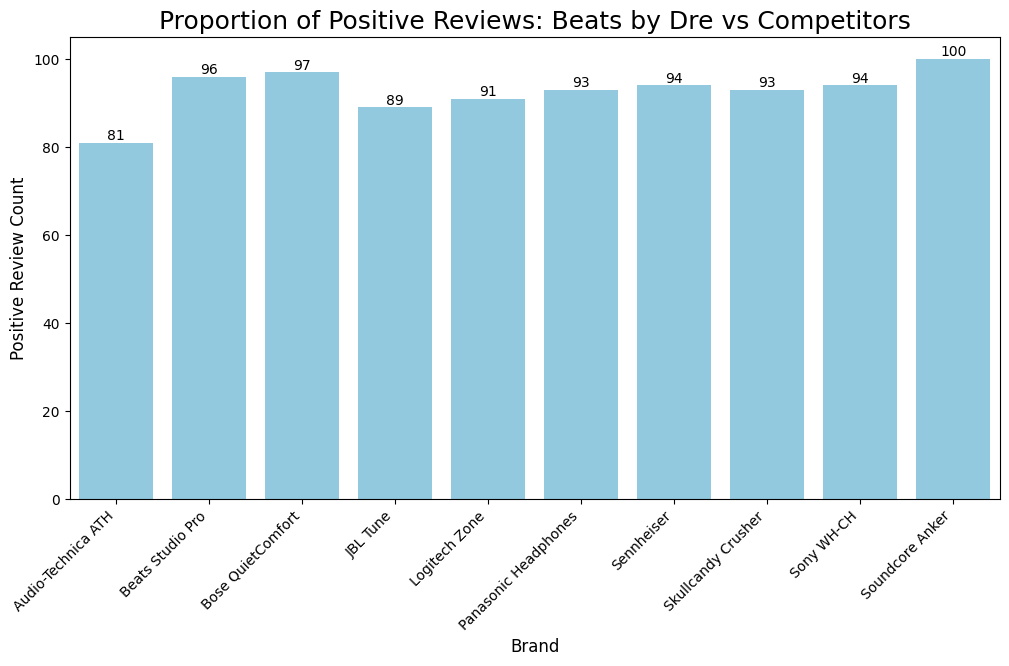

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate proportion of positive sentiment for each brand
positive_sentiment = main_dataframe[main_dataframe['SENTIMENT'] == 'Positive'].groupby('BRAND').size().reset_index(name='count')

# Bar plot to compare the proportion of positive reviews across brands with a single color
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='BRAND', y='count', data=positive_sentiment, color='#87CEEB')  # Light blue color

# Annotate the bar plot with review counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),  # X and Y position
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Proportion of Positive Reviews: Beats by Dre vs Competitors', fontsize=18)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Positive Review Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

- This plot will show how Beats by Dre fares against competitors in terms of positive reviews.

**Weaknesses**:
- **Noise Cancellation Performance**: Compared to competitors like Sony and Bose, Beats’ noise cancellation is not considered top-tier. This is a critical area for improvement as high-end consumers increasingly value premium noise-cancelling features.
- **Fit and Comfort for Extended Use**: Some reviews highlight issues with fit, particularly for users with larger heads, leading to discomfort during prolonged use. This places Beats behind competitors like Bose and Sennheiser, known for superior long-term comfort.
- **Build Quality**: The use of plastic in construction leads to durability concerns, especially with some products being described as prone to fingerprints and minor aesthetic wear, diminishing their appeal over time.

**Box Plot for Sentiment Polarity (Weaknesses Visualization):**

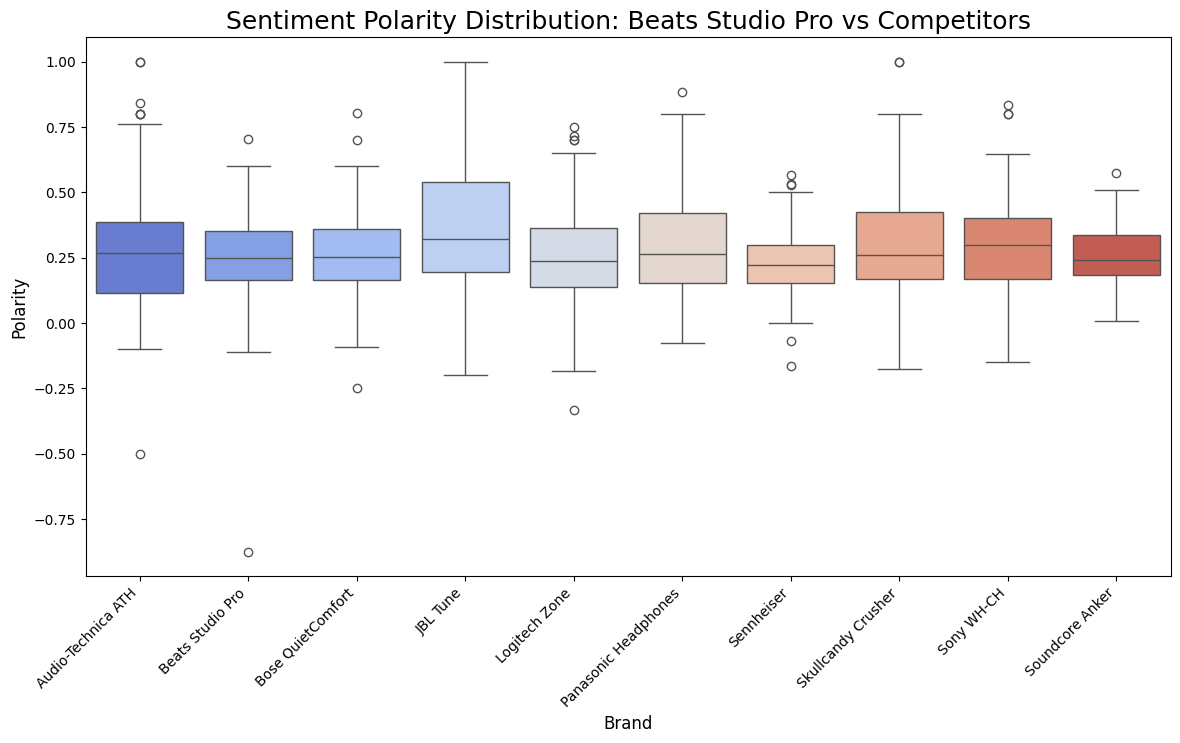

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to compare the distribution of sentiment polarity for each brand
plt.figure(figsize=(14, 7))

# Set hue to 'BRAND' to use the palette correctly and remove the legend
sns.boxplot(x='BRAND', y='POLARITY', data=main_dataframe, hue='BRAND', palette='coolwarm', dodge=False)

plt.title('Sentiment Polarity Distribution: Beats Studio Pro vs Competitors', fontsize=18)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

- This box plot visualizes the spread of sentiment polarity across brands. You can identify Beats’ weaknesses by comparing its lower sentiment polarity in areas like sound quality and comfort to that of competitors.

**Opportunities**:
- **Innovation in Noise-Cancelling Technology**: With the growing demand for advanced noise-cancelling features, Beats has an opportunity to improve in this area and compete more directly with premium offerings from Sony and Bose.
- **Expansion of Product Line**: There is room to expand the product line with more varied price points and features, such as headphones with improved multi-device connectivity, customizable EQ settings, or models designed for professional audio use.
- **Leveraging Apple Ecosystem**: Beats can further leverage its seamless integration with Apple products, introducing exclusive features for iOS users, such as enhanced Spatial Audio or features tied to Apple’s software updates.
- **Sustainability**: Embracing sustainability trends through eco-friendly materials or energy-efficient production could appeal to environmentally conscious consumers and enhance brand reputation.

**Stacked Bar Plot for Sentiment Categories (Opportunities Visualization):**

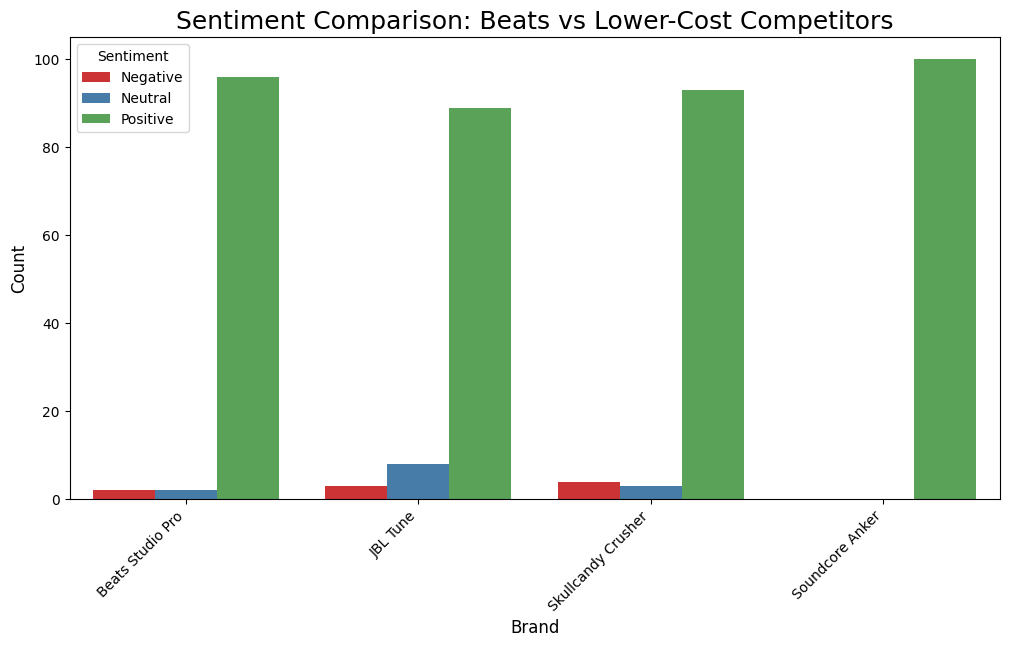

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by BRAND and SENTIMENT to get sentiment distribution
sentiment_distribution = main_dataframe.groupby(['BRAND', 'SENTIMENT']).size().reset_index(name='count')

# Filter for brands to compare Beats and lower-cost competitors
brands_of_interest = ['Beats Studio Pro', 'JBL Tune', 'Soundcore Anker', 'Skullcandy Crusher']

# Stacked bar plot to compare sentiment distribution
plt.figure(figsize=(12, 6))

# Set hue to 'SENTIMENT' to differentiate sentiment types
sns.barplot(x='BRAND', y='count', hue='SENTIMENT', data=sentiment_distribution[sentiment_distribution['BRAND'].isin(brands_of_interest)], palette='Set1')

plt.title('Sentiment Comparison: Beats vs Lower-Cost Competitors', fontsize=18)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

- This stacked bar plot will allow us to compare Beats with lower-cost competitors like JBL and Soundcore Anker. We can use this visualization to highlight opportunities for Beats to compete by addressing pricing and improving sound quality.

**Threats**:
- **Intense Competition**: The headphone market is saturated with well-established competitors such as Sony, Bose, Sennheiser, and up-and-coming brands offering high-quality, feature-rich products at competitive prices. This creates pressure for Beats to consistently innovate and maintain its market share.
- **Consumer Price Sensitivity**: Despite strong brand recognition, some consumers perceive Beats as overpriced, especially when compared to competitors offering similar or superior features at lower price points.
- **Shifting Consumer Preferences**: As consumers demand more from their headphones, such as superior noise cancellation, high-definition sound, and longer battery life, failure to meet these evolving preferences could lead to loss of market share to competitors that adapt more quickly.
- **Dependency on Apple**: While Apple integration is a strength, reliance on this ecosystem may alienate Android and non-iOS users, limiting Beats’ market appeal across all platforms.

**Threat Visualization with Line Plot:**

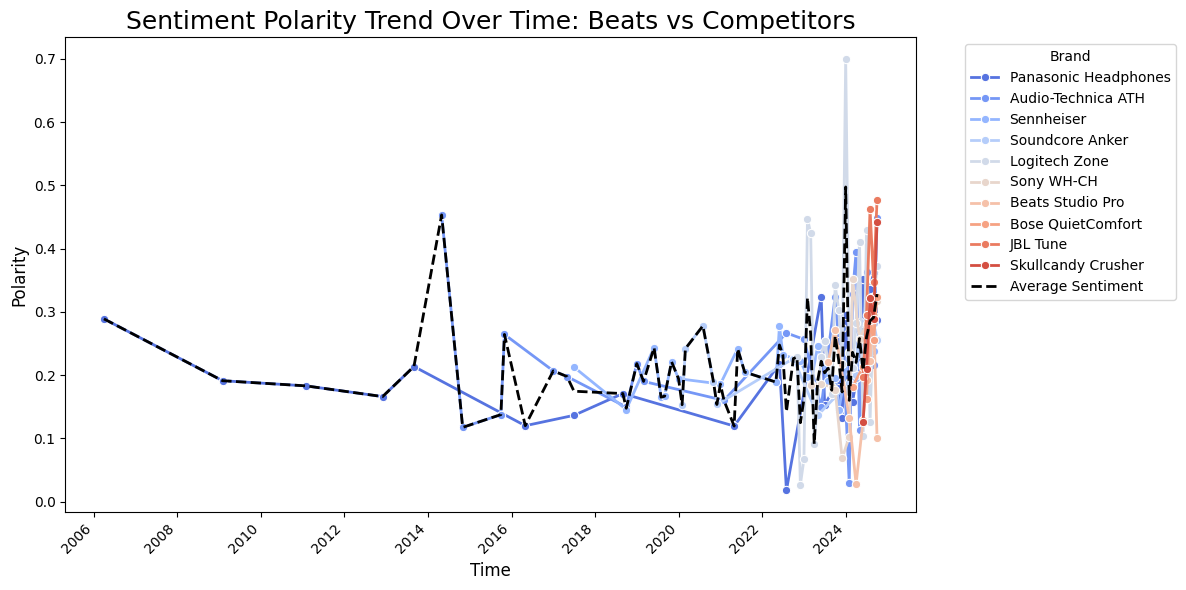

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the TIMESTAMP column to datetime if available
main_dataframe['TIMESTAMP'] = pd.to_datetime(main_dataframe['TIMESTAMP'])

# Group by brand and time to track sentiment trends
sentiment_trend = main_dataframe.groupby([pd.Grouper(key='TIMESTAMP', freq='M'), 'BRAND'])['POLARITY'].mean().reset_index()

# Calculate the average polarity across all brands per time point
average_sentiment_trend = sentiment_trend.groupby('TIMESTAMP')['POLARITY'].mean().reset_index()

# Line plot to compare sentiment polarity trends over time
plt.figure(figsize=(12, 6))

# Plot each brand's sentiment trend with markers and thicker lines for readability
sns.lineplot(x='TIMESTAMP', y='POLARITY', hue='BRAND', data=sentiment_trend, palette='coolwarm', linewidth=2, marker='o')

# Add a dashed line for the average sentiment polarity trend
sns.lineplot(x='TIMESTAMP', y='POLARITY', data=average_sentiment_trend, color='black', linewidth=2, linestyle='--', label='Average Sentiment')

# Title and labels
plt.title('Sentiment Polarity Trend Over Time: Beats vs Competitors', fontsize=18)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display legend and show plot
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Line plot to show sentiment trends over time and identify potential threats from competitors who are improving.

## 9. Strategic Recommendations

### 9.1 Product Improvements

**Recommended Product Improvements for Beats by Dre**

**1. Enhance Noise Cancellation Technology**:
   - **Current Issue**: Compared to competitors like **Sony** and **Bose**, Beats’ noise cancellation features are not as effective, especially in blocking out mid-range and high-frequency noises.
   - **Improvement**: Invest in developing advanced **active noise cancellation (ANC)** algorithms, similar to Sony’s adaptive noise control technology, which adjusts in real-time based on environmental conditions. Beats can also explore hybrid ANC technology that combines feedforward and feedback microphones for more precise noise cancellation.

**2. Address Fit and Comfort for Extended Use**:
   - **Current Issue**: Reviews have highlighted discomfort, particularly for users with larger heads, as the clamping force and earcup depth can lead to ear fatigue during extended use.
   - **Improvement**: Modify the design of the **earcups and headband** to provide a more comfortable fit. Consider introducing memory foam padding with better airflow and increasing the adjustability of the headband to accommodate a wider range of users. These improvements would make Beats more competitive with brands like **Bose** and **Sennheiser**, which are known for their superior comfort.

**3. Improve Build Quality**:
   - **Current Issue**: The use of plastic in construction, particularly in high-touch areas like the earcups and headband, leads to concerns over durability and aesthetics, including fingerprints and wear over time.
   - **Improvement**: Introduce more **premium materials** such as metal frames or carbon fiber for a more durable build. Adding a matte finish or coating to the plastic could reduce fingerprints and scratches, improving the product’s longevity and appeal.

**4. Expand Multi-Device Connectivity and Features**:
   - **Current Issue**: While **Apple integration** is a strength, Beats lacks **multi-device connectivity** features that are standard in competing brands like **Sony** and **JBL**.
   - **Improvement**: Add **multipoint Bluetooth connectivity** to allow seamless switching between devices like smartphones, tablets, and laptops. Expanding on Apple’s H1 chip functionality, Beats could also introduce **automatic pause/resume** features when removing or wearing the headphones, enhancing user convenience.

**5. Introduce Customizable Sound Profiles**:
   - **Current Issue**: Beats headphones offer limited sound customization options, which can alienate users who prefer more control over their audio experience.
   - **Improvement**: Develop an in-app **equalizer (EQ)** that allows users to create personalized sound profiles. Competing brands like **Sennheiser** and **Sony** offer customizable EQ settings, which provide users with more flexibility to adjust bass, mids, and treble based on their preferences.

**6. Focus on Durability for On-the-Go Users**:
   - **Current Issue**: Portability concerns, such as long non-detachable cables and hinge durability, affect the practical use of some Beats models.
   - **Improvement**: Design **foldable models** with detachable or retractable cables and introduce stronger hinges to improve portability. Offering a rugged, travel-friendly case as part of the package would further appeal to on-the-go users, bringing Beats in line with brands like **Bose** and **Anker**, which offer strong portability options.

**7. Price Adjustment or Added Value for Premium Features**:
   - **Current Issue**: Some users feel Beats is **overpriced** compared to competitors with similar or superior features.
   - **Improvement**: Consider offering **bundled features** such as AppleCare+, extended warranties, or exclusive accessories (e.g., premium cases or charging docks) to add more value at the current price point. Alternatively, introduce a more competitively priced model with premium features to appeal to price-sensitive consumers.

**8. Address Sustainability and Eco-Friendly Design**:
   - **Current Issue**: The market is increasingly demanding sustainability in product design, but Beats has not significantly addressed this area.
   - **Improvement**: Implement **sustainable materials** in headphone production, such as recycled plastics and eco-friendly packaging. Promote energy-efficient manufacturing processes to appeal to environmentally conscious consumers and align with emerging industry trends.

**Conclusion**:
Implementing these product improvements will not only elevate Beats by Dre’s competitive position but also expand its appeal to a broader audience, from audiophiles to casual users. By enhancing noise cancellation, comfort, durability, and customization, Beats can better compete with industry leaders while leveraging its strengths in sound quality and brand recognition.

### 9.2 Marketing Strategies

**Marketing Strategy Recommendations for Beats by Dre**

**1. Leverage Brand Partnerships and Celebrity Endorsements**:
   - **Rationale**: Beats by Dre has built its brand on high-profile celebrity endorsements, from athletes to musicians. Continuing to partner with influential figures and tapping into **social media influencers** can further solidify Beats as a lifestyle brand.
   - **Strategy**: Focus on **strategic partnerships** with rising influencers in the music, sports, and entertainment industries. Collaborations with high-visibility artists on platforms like TikTok, Instagram, and YouTube can increase brand awareness and reach younger audiences. Highlight testimonials and use cases from influencers to showcase product features, such as sound quality, durability, and style.

**2. Expand Customer Loyalty Programs**:
   - **Rationale**: Loyalty programs are known to improve customer retention by offering incentives for repeat purchases and brand advocacy. Implementing an engaging **customer rewards program** could increase long-term consumer satisfaction.
   - **Strategy**: Develop a **Beats Loyalty Program** that offers exclusive benefits such as early access to new products, discounts, and custom accessories. Gamify the program by rewarding points for product reviews, social shares, and referrals. Offering limited edition collaborations or customization options exclusively to members can also incentivize more purchases.

**3. Emphasize Sound Quality and Premium Features**:
   - **Rationale**: While Beats has been known for its bass-heavy sound, the brand’s advancements in **balanced sound quality** and **integration with Apple products** are not as well-promoted.
   - **Strategy**: Create targeted campaigns that focus on **technical product features**, such as **noise cancellation**, **balanced sound**, and **Apple ecosystem integration**. Highlighting these strengths in product reviews, comparison videos, and technical breakdowns will appeal to audiophiles and tech enthusiasts. Using detailed content marketing like blogs, podcasts, and videos that showcase product features could shift the perception toward Beats being a premium audio brand.

**4. Promote Product Differentiation through Digital Experiences**:
   - **Rationale**: The headphone market is saturated with high-performing brands, so standing out through **digital engagement** can increase brand loyalty and consumer satisfaction.
   - **Strategy**: Invest in **interactive digital experiences** such as virtual reality (VR) or augmented reality (AR) demos that allow users to “test” Beats headphones online. Integrate these experiences into the Beats website, offering potential buyers a unique way to engage with the product. Additionally, host virtual listening sessions with musicians to demonstrate the capabilities of the Beats Studio Pro’s sound quality in real-time.

**5. Emphasize Eco-Friendly and Sustainable Practices**:
   - **Rationale**: Consumers are increasingly concerned with sustainability and are more likely to choose brands that prioritize environmental responsibility.
   - **Strategy**: Highlight **eco-friendly initiatives**, such as using recycled materials or eco-conscious manufacturing practices in product packaging and advertising campaigns. Launch a **“green initiative”** where consumers can trade in old headphones for a discount on new models. Promote this as part of a broader **corporate social responsibility (CSR)** strategy to build trust and brand loyalty among eco-conscious consumers.

**6. Increase Focus on Consumer Education and Support**:
   - **Rationale**: Educating customers on product features, particularly how to maximize **Apple integration**, can significantly improve the overall user experience.
   - **Strategy**: Create comprehensive online tutorials and customer support content that explains how to use advanced features like **Spatial Audio**, **multi-device pairing**, and **Transparency Mode**. Offering dedicated customer support and troubleshooting for both iOS and Android users can increase satisfaction and reduce frustration with setup and device management.

**7. Leverage Data-Driven Personalization**:
   - **Rationale**: Consumers are increasingly expecting **personalized experiences** based on their preferences and behaviors.
   - **Strategy**: Use **AI-driven insights** and data analytics to provide personalized recommendations and targeted marketing for Beats users. For example, offer curated playlists or suggest product upgrades based on the customer’s usage patterns and music preferences. Additionally, send personalized email campaigns featuring exclusive offers or updates based on past purchases.

**Conclusion**:
By focusing on influencer partnerships, loyalty programs, digital engagement, and sustainability, Beats by Dre can enhance consumer perception and satisfaction. These strategies, combined with an emphasis on product differentiation and personalized experiences, will help Beats strengthen its market position and maintain long-term customer loyalty.

### 9.3 Future Research

**Areas for Future Research and Additional Data Collection**

**1. Consumer Behavior and Preferences**
   - **Rationale**: Understanding consumer preferences and behavior is key to product development and positioning. While current reviews provide insights into sound quality, noise cancellation, and comfort, collecting more **detailed behavioral data** could help refine product features and marketing strategies.
   - **Future Research**: Conduct surveys and user testing to gather data on specific **use cases**, such as fitness, work-from-home setups, gaming, and travel. This could identify untapped market segments and inform the development of targeted product lines that address unique user needs, such as sweat-resistant or workout-friendly headphones.
   - **Additional Data**: Analyze **purchase patterns** across demographics to identify emerging trends in **consumer preferences** and willingness to pay for specific features. This could be further segmented by factors like **geographical location** and **device ecosystem** preferences (iOS vs. Android).

**2. In-Depth Competitor Benchmarking**
   - **Rationale**: The analysis so far provides a general comparison between Beats and its competitors. However, a more granular approach could offer deeper insights into how specific features (such as noise cancellation or battery life) stack up against the latest offerings from competitors like Sony, Bose, and Sennheiser.
   - **Future Research**: Conduct a **feature-by-feature benchmark study** using a controlled environment to compare Beats products against the top models from competitors. Metrics such as **decibel reduction in noise-cancelling headphones**, **frequency response accuracy**, and **battery performance under stress** could provide actionable insights.
   - **Additional Data**: Gather data on competitors’ **sales performance and market share** across different regions to understand how they achieve product differentiation and pricing strategies. Tracking **customer retention rates** and **brand loyalty** metrics would also provide deeper competitive intelligence.

**3. Sound Customization and Personalization Insights**
   - **Rationale**: As consumer demand grows for more customizable audio experiences, it’s important to understand how users want to personalize their sound settings and use EQ features. While some competitors offer extensive **sound customization options**, Beats can enhance its offerings by understanding exactly which features users value most.
   - **Future Research**: Analyze data on how consumers interact with **customizable EQ settings** and preferences for sound personalization (bass, treble, mids). Surveys and direct feedback from users could reveal trends in desired sound profiles across different genres and activities (e.g., gaming vs. commuting).
   - **Additional Data**: Collect data on **real-time sound adjustment behavior** through in-app analytics, tracking how users modify their sound settings during various activities, and integrate AI-driven suggestions for better sound experiences.

**4. Environmental Impact and Sustainability Preferences**
   - **Rationale**: Sustainability is becoming a significant factor in consumer buying decisions. However, limited data currently exists on how environmentally conscious Beats’ customer base is and how this might affect product choices.
   - **Future Research**: Investigate **consumer attitudes** toward sustainability in tech products, particularly headphones. Research whether customers are willing to pay a premium for **eco-friendly materials** and sustainable packaging, and what specific environmental concerns (e.g., recyclability, energy-efficient production) drive their purchasing decisions.
   - **Additional Data**: Collect **lifecycle data** on the environmental footprint of Beats products, from material sourcing to end-of-life recycling options. This data could guide future product designs that cater to eco-conscious consumers and enhance the brand’s reputation in sustainability.

**5. Usability and Long-Term Comfort Data**
   - **Rationale**: Comfort is a recurring theme in customer reviews, particularly regarding extended use. However, there is limited quantitative data on **long-term comfort** and how Beats products perform in diverse settings.
   - **Future Research**: Conduct ergonomic studies to evaluate the **comfort** and **fit** of Beats headphones during prolonged use across various head sizes and shapes. Testing could include different user activities such as commuting, working, and exercising.
   - **Additional Data**: Gather **quantitative data** on headband pressure, earcup heat retention, and weight distribution to refine designs for maximum long-term comfort. This data could be cross-referenced with customer feedback to develop adjustable features that cater to diverse user preferences.

**6. Integration with Emerging Technologies**
   - **Rationale**: With rapid advancements in wireless audio technology, there is significant potential for Beats to integrate cutting-edge features such as **spatial audio**, **AI-driven noise cancellation**, and **biometric sensors**.
   - **Future Research**: Explore emerging trends in **audio-immersive experiences** such as virtual and augmented reality (VR/AR), where precise sound placement and 3D audio are critical. Additionally, investigate how AI can enhance **real-time sound adjustments** based on environmental noise and user preferences.
   - **Additional Data**: Analyze **real-world usage data** on how users interact with features like **Spatial Audio**, **Transparency Mode**, and **multi-device pairing** to identify further integration opportunities with smart home devices and virtual assistants (Siri, Google Assistant).

**Conclusion**:
By expanding research into areas like **consumer behavior**, **sustainability**, **customization preferences**, and emerging technology trends, Beats by Dre can continue to innovate and better align its products with consumer needs. Collecting additional data on these fronts will ensure Beats remains competitive in a fast-evolving market.

## 10. Conclusion

**Summary of Key Findings and Implications**

**Key Findings**:
- **Consumer Sentiment**: The analysis reveals strong positive sentiment toward **Beats by Dre**, particularly for its **sound quality**, **design**, and **Apple ecosystem integration**. However, areas of concern include **noise cancellation**, **comfort for extended use**, and **build quality**, with consumers citing issues related to durability and fit.
- **Competitive Landscape**: Competitors like **Sony** and **Bose** outshine Beats in key areas such as **noise cancellation** and **comfort**, whereas **Skullcandy** and **JBL** perform well in the budget segment. Beats remains competitive through its brand recognition and design appeal but faces pressure to innovate in performance features.
- **Opportunities for Growth**: Improving **noise cancellation**, addressing **comfort** issues for larger audiences, and enhancing **multi-device connectivity** can elevate Beats’ standing in the premium headphone market.

**Implications**:
- **Product Development**: The findings indicate a need for focused enhancements in product durability, noise-cancelling technology, and ergonomics to better compete with market leaders.
- **Market Positioning**: Beats’ association with Apple continues to be a strong advantage, but the brand should diversify its offerings and focus on **value-for-money** propositions to appeal to broader consumer segments.
- **Marketing Strategies**: Emphasizing **Apple integration**, while improving communication around the technical strengths of Beats products, can help shift consumer perception toward viewing Beats as more than just a fashion-forward brand.

**Reflection on the Overall Project**:
This project provides a comprehensive understanding of **consumer sentiment** for Beats by Dre by comparing its performance against key competitors. It highlights not only where Beats excels but also where strategic improvements are needed. The analysis contributes valuable insights for future product development and marketing efforts, aligning consumer needs with innovative solutions.

**Conclusion**:
Through this project, Beats by Dre gains clear insights into consumer expectations and competitive positioning, which will be instrumental in driving product innovation and sustaining market leadership in the premium audio space.

## 11. References

**References**

1. **Development Environment**:  
   - The entire project was conducted on **Google Colab**, utilizing Python for data analysis and visualization.  
   - Libraries used include:  
     - **Numpy**: For numerical operations and data manipulation.  
     - **Pandas**: For data cleaning, processing, and analysis.  
     - **Matplotlib** and **Seaborn**: For creating visualizations to analyze customer review trends and sentiment distribution.

2. **Data Source**:  
   - Consumer review data was sourced from the **Amazon USA** website, focusing on customer feedback for 10 specific headphone brands. Each product had approximately 100 reviews included in the analysis.

3. **AI-Powered Analysis**:  
   - **Google’s Gemini AI** was utilized to extract sentiment insights from customer reviews, enabling deeper understanding of consumer sentiment across different products.

4. **Brands and Products Analyzed**:  
   - The following headphone brands and products were included in the analysis:
     1. **Beats by Dre**: Beats Studio Pro  
     2. **Bose**: QuietComfort Headphones  
     3. **Sony**: WH-CH720N Headphones  
     4. **Sennheiser**: HD 599 Headphones  
     5. **JBL**: Tune 720BT Wireless Headphones  
     6. **Audio-Technica**: ATH-M20x Headphones  
     7. **Skullcandy**: Crusher Evo Headphones  
     8. **Panasonic**: RP-HT21 Headphones  
     9. **Logitech**: Zone Vibe 100 Headphones  
     10. **Anker (Soundcore)**: Life Q20 Headphones

5. **Tools and Technologies**:  
   - **Python** was used throughout the project, with a focus on libraries like **Numpy**, **Pandas**, **Matplotlib**, **NLTK**, **TextBlob** and **Seaborn** to facilitate data manipulation, visualization, and analysis of customer sentiment.

This project successfully combined AI-powered sentiment analysis with Python-based tools to provide valuable insights from customer reviews.